# Let us get the basics done.  Import the relevant libraries


In [917]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [918]:
pd.set_option('display.max_rows', None)
sns.set()
sns.set(style="white", palette="tab10")

In [919]:
# Now read the data set
loan_df = pd.read_csv('loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [920]:
loan_df.shape


(39717, 111)

In [921]:
# Are there columns that have only one value? Such columns cannot really provide much value
cardinality = loan_df.nunique(axis=0)
print(cardinality)

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [922]:
columns_with_cardinality_1 = cardinality[cardinality == 1].index
print(columns_with_cardinality_1)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


### Columns with one values

You can see that there are a bunch of columns with only one values.  These columns are not of much use.

In [923]:
loan_df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis = 1, inplace = True)

In [924]:
loan_df.shape

(39717, 102)

In [925]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Just a perusal of the data in these 5 rows, we see that there are a lot of columns with NaN values or null values.
> Let us get some data about how many values are null

In [926]:
loan_df.isnull().sum()


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0
delinq_2yrs                           0


### There are so many columns with null values
> Some of the columns are total_bal_il, tot_cur_bal, annual_inc_joint, mths_since_last_major_derog

In [927]:
# Let us remove them
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [928]:
loan_df.shape

(39717, 48)

In [929]:
# What values does the loan status column have?

value_counts = loan_df['loan_status'].value_counts()
print(value_counts)


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


In [930]:
# Loans that are 'current' i.e. that are still in the repayment window cannot be considered.  Let us discard them.
loan_df = loan_df[loan_df.loan_status != 'Current']

In [931]:
loan_df.shape

(38577, 48)

In [932]:
# desc is a column that does not give any value.  
loan_df.drop(['desc'], axis = 1, inplace = True)

# Similarly, next_paymnt_d and mths_since_last_delinq cannot be used to give any insights.  
# mths_since_last_record just shows how long someone has gone without any public records.  So this is not of any use to us.
# Removing these two.

loan_df.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], axis = 1, inplace = True)


# Added from Ajay's Notebook
loan_df.drop(["member_id", "url", "last_credit_pull_d","out_prncp_inv","total_pymnt_inv","funded_amnt_inv", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis = 1, inplace = True)






In [933]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [934]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [935]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [936]:
loan_df.describe()

,id,loan_amnt,funded_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
count,3.857700e+04,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,6.763787e+05,11047.025430,10784.058506,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,22.052648,0.043479
std,2.092639e+05,7348.441646,7090.306027,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,11.425861,0.204583
min,5.473400e+04,500.000000,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,5.120330e+05,5300.000000,5200.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,13.000000,0.000000
50%,6.564230e+05,9600.000000,9550.000000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000
75%,8.291460e+05,15000.000000,15000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000
max,1.077501e+06,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,2.000000


### Clean values with symbols

In [937]:
#stripping '%' value
loan_df['int_rate'] = loan_df.int_rate.str.strip('%').astype(float)
loan_df['revol_util'] = loan_df.revol_util.str.strip('%').astype(float)

In [938]:
# Clean the employee length param
loan_df.emp_length.fillna('0',inplace=True)
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')

In [939]:
loan_df.shape

(38577, 29)

## Change the format of dates

In [940]:
# Added from Ajay's Notebook

# Columns "issue_d" and "earliest_cr_line" have to be converted to date datatype

loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'], format='%b-%y')


# Extract year and month into new columns
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.strftime('%b')

loan_df['earliest_cr_year'] = loan_df['earliest_cr_line'].dt.year
loan_df['earliest_cr_month'] = loan_df['earliest_cr_line'].dt.month

In [941]:
loan_df.shape

(38577, 33)

## Create some derived attributes

In [942]:
# Since the max loan amount is 35k, let us use 7 bins of 5k each 
loan_df['amount_bins'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['>0-5k','>5k-10k','>10k-15k','>15k-20k','>20k-25k','>25k-30k','>30k-35k'])

### Income groups can be created to bucket the annual income of borrowwers.
__Creating 7 income groups - 0-50K, 50K-100K, 100K-150K, 150K - 200K, 200K - 250K, 250K - 300K__


In [407]:
annual_inc_bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, float('inf')]
annual_inc_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200-250k', '250k-300k', '>300k']

loan_df['annual_income_groups'] = pd.cut(loan_df['annual_inc'], precision =0,bins=annual_inc_bins, labels=annual_inc_labels)

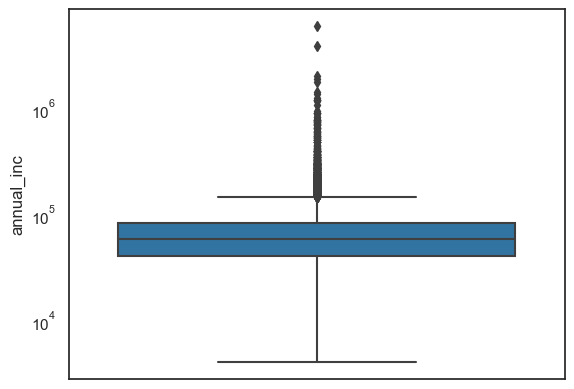

In [944]:
facet=sns.boxplot(data=loan_df, y='annual_inc')
facet.set_yscale('log')

In [945]:
loan_df['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

## Handling Outliers


<Axes: >

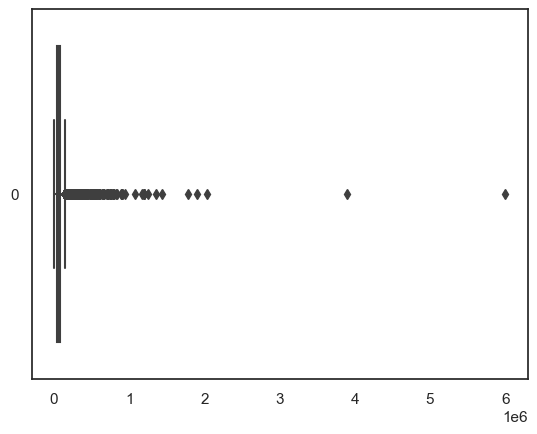

In [946]:
# "annual_inc"
sns.boxplot(loan_df['annual_inc'], orient="h")

In [947]:
loan_df['annual_inc'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
90%      1.150000e+05
95%      1.400040e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [948]:
#Remove the outliers by considering the threshold as 0.95, because values after 95 percentile seems to be disconnected from the general distribution.
loan_df = loan_df[loan_df['annual_inc'] <= loan_df['annual_inc'].quantile(0.95)]

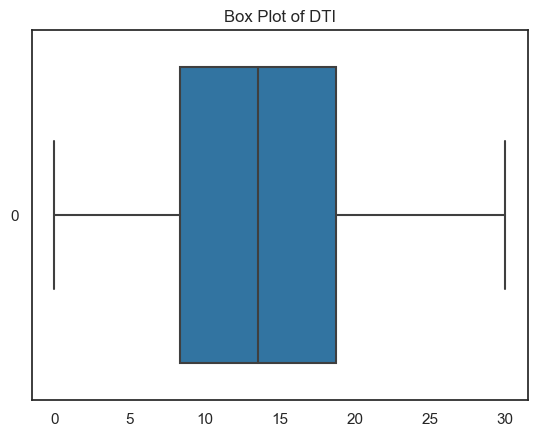

In [949]:
# Analysing other numerical variables "dti", "loan_amnt", "funded_amnt_inv"
#"dti"
sns.boxplot(loan_df.dti,orient="h")
plt.title("Box Plot of DTI")
plt.show()

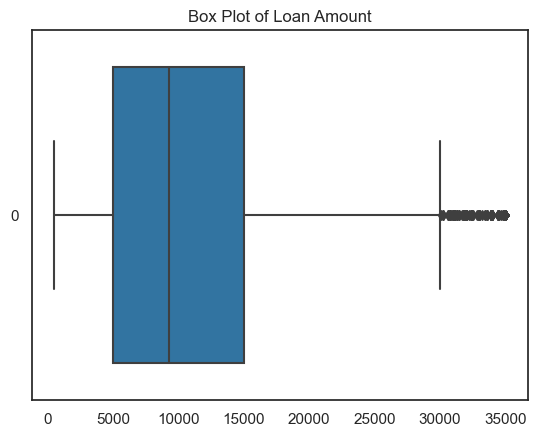

In [950]:
#"loan_amnt"
sns.boxplot(loan_df.loan_amnt,orient="h")
plt.title("Box Plot of Loan Amount")
plt.show()

In [951]:
loan_df['loan_amnt'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99])

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
5%        2250.000000
10%       3000.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
90%      20000.000000
95%      25000.000000
96%      25000.000000
97%      25475.000000
98%      30000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

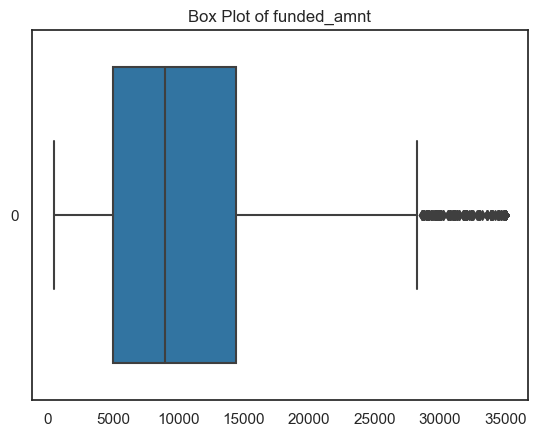

In [952]:
#"funded_amnt_inv"
sns.boxplot(loan_df.funded_amnt,orient="h")
plt.title("Box Plot of funded_amnt")
plt.show()

In [953]:
loan_df['funded_amnt'].describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95,0.96,0.97,0.98,0.99])

count    36654.000000
mean     10436.144077
std       6800.636737
min        500.000000
5%        2200.000000
10%       3000.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
90%      20000.000000
95%      25000.000000
96%      25000.000000
97%      25000.000000
98%      28100.000000
99%      34000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [954]:
#Though the distribution seems to be continuous, there are some values far from distribution of funded amount, we can remove those by considering the threshold as 0.98
loan_df = loan_df[loan_df['loan_amnt'] <= loan_df['loan_amnt'].quantile(0.98)]

In [955]:
loan_df.shape

(36115, 35)

# Univariate Analysis
#### The intention is to analyze and understand the characteristics and distribution of each variables.

### * loan_status

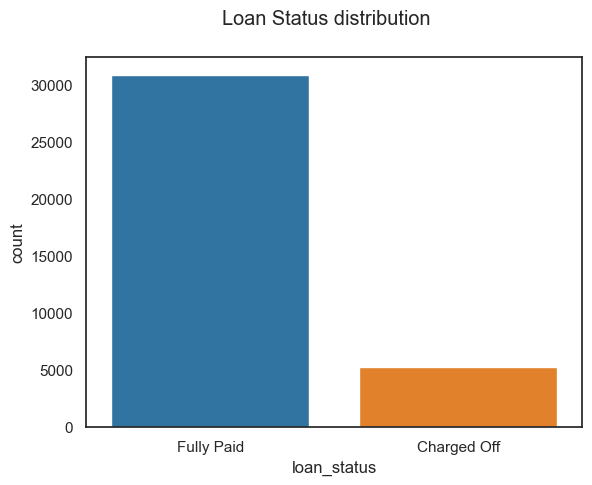

In [956]:
sns.countplot(x = 'loan_status', data = loan_df)
plt.suptitle('Loan Status distribution')
plt.show()

In [957]:
loan_df['loan_status'].value_counts(normalize=True) * 100

Fully Paid     85.424339
Charged Off    14.575661
Name: loan_status, dtype: float64

#### Observation: 85% of borrowers have paid the loan fully. whereas 15% are defaulters

### * Loan Term

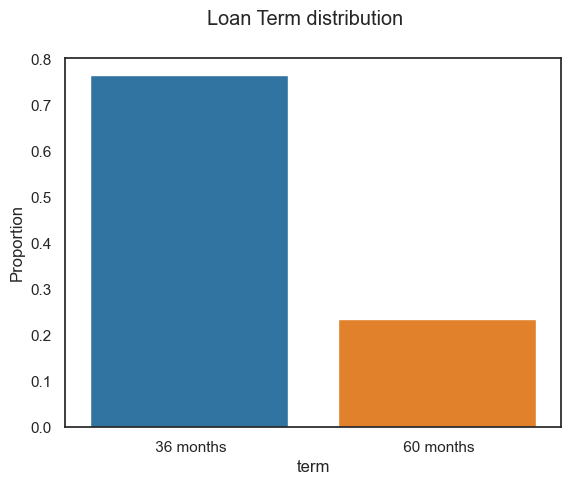

In [958]:
var="term"
prob_df = loan_df["term"].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.suptitle('Loan Term distribution')
plt.show()

In [959]:
loan_df['term'].value_counts(normalize=True) * 100

 36 months    76.422539
 60 months    23.577461
Name: term, dtype: float64

#### Observation : Majority of loans (76%) have a 36-month term

### * Loan Amount

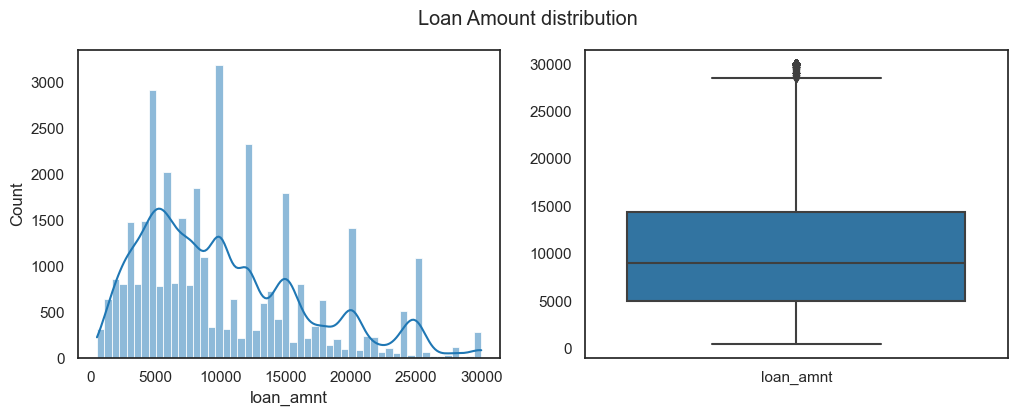

In [960]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(loan_df.loan_amnt, kde=True)
plt.subplot(1, 2, 2)
boxplot = sns.boxplot(data=loan_df.loan_amnt)
boxplot.set_xticklabels(['loan_amnt'])
plt.suptitle('Loan Amount distribution')
plt.show()

In [961]:
loan_df.loan_amnt.describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95])

count    36115.000000
mean     10327.305136
std       6467.821666
min        500.000000
5%        2200.000000
10%       3000.000000
25%       5000.000000
50%       9000.000000
75%      14400.000000
90%      20000.000000
95%      24000.000000
max      30000.000000
Name: loan_amnt, dtype: float64

#### Observation: Average loan amount is approximately 10000 and the median loan amount is 9000

### * Funded Amount

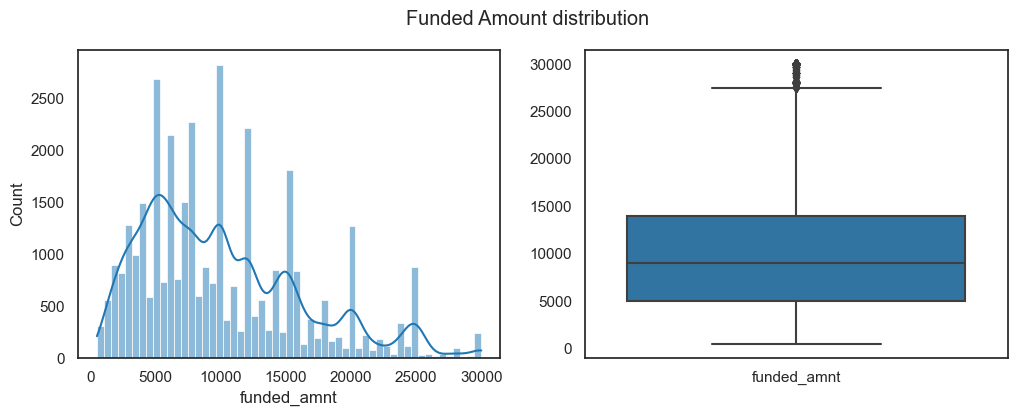

In [962]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(loan_df.funded_amnt, kde=True)
plt.subplot(1,2,2)
boxplot=sns.boxplot(data=loan_df.funded_amnt)
boxplot.set_xticklabels(['funded_amnt'])
plt.suptitle('Funded Amount distribution')
plt.show()

In [963]:
loan_df.funded_amnt.describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95])

count    36115.000000
mean     10104.487747
std       6260.019188
min        500.000000
5%        2200.000000
10%       3000.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
90%      20000.000000
95%      24000.000000
max      30000.000000
Name: funded_amnt, dtype: float64

#### Observation: Data shows that Mean and Median of funded amount closely matches with that of loan amount. Funds have been allocated to most of the loans applied.

### * Interest Rate

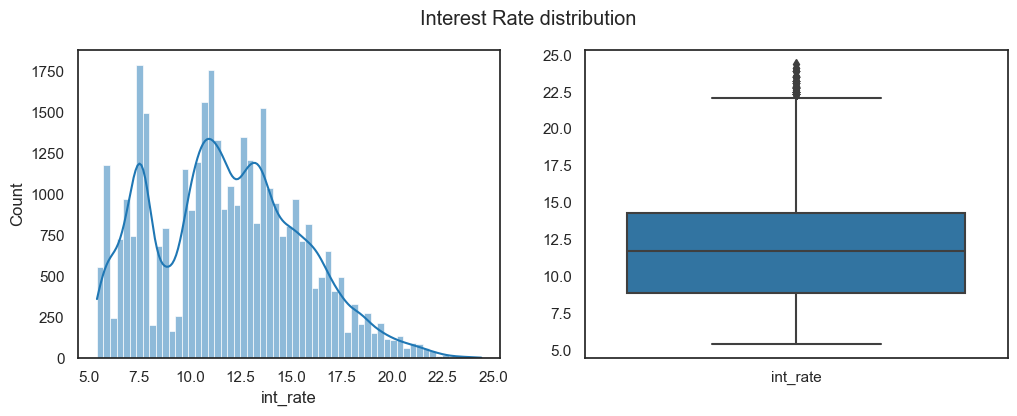

In [964]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(loan_df.int_rate, kde=True)
plt.subplot(1,2,2)
boxplot=sns.boxplot(data=loan_df.int_rate)
boxplot.set_xticklabels(['int_rate'])
plt.suptitle('Interest Rate distribution')
plt.show()

In [965]:
loan_df.int_rate.describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95])

count    36115.000000
mean        11.829440
std          3.630671
min          5.420000
5%           6.170000
10%          6.990000
25%          8.900000
50%         11.710000
75%         14.270000
90%         16.690000
95%         18.170000
max         24.400000
Name: int_rate, dtype: float64

#### Observation : Most of the loans interest rate lies between 8% to 14%

### * purpose

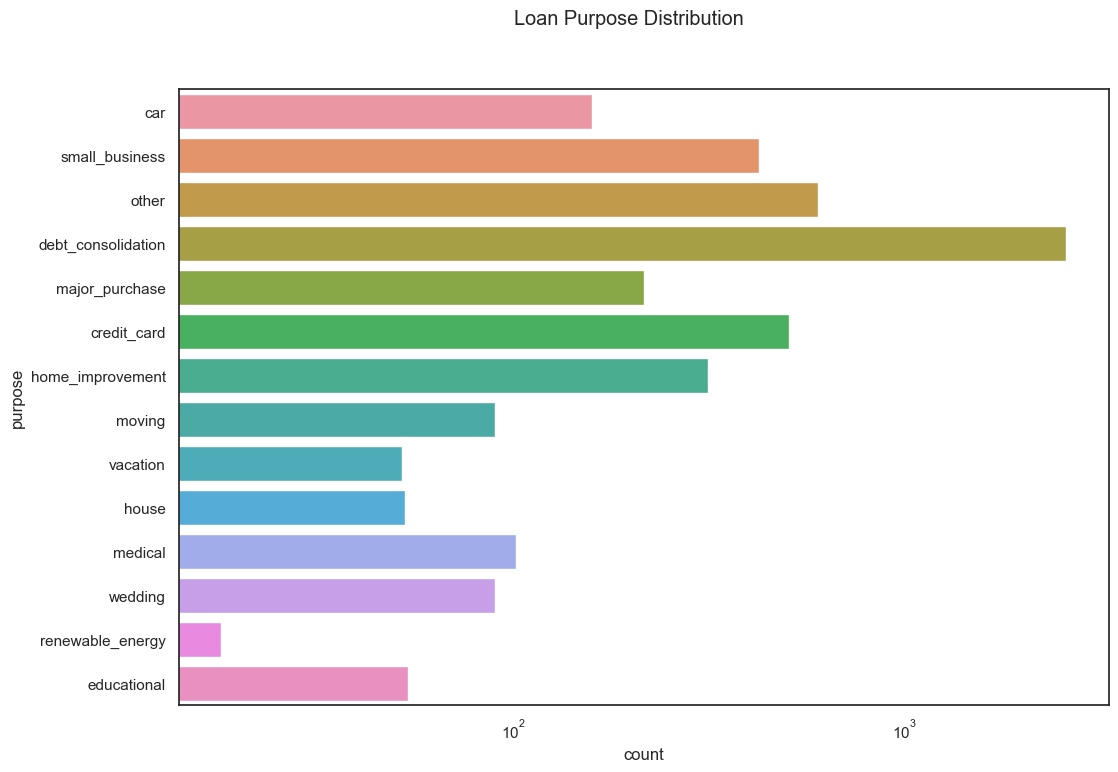

In [966]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.suptitle('Loan Purpose Distribution')
plt.show()

#### Observation: More number of people took loan debt consolidation and few took for renewable energy

### * Home Ownership

In [967]:
loan_df['home_ownership'].value_counts()

RENT        17889
MORTGAGE    15311
OWN          2819
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

In [968]:
#Replace "NONE" value with "OTHERS"
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [969]:
loan_df['home_ownership'].value_counts()

RENT        17889
MORTGAGE    15311
OWN          2819
OTHER          96
Name: home_ownership, dtype: int64

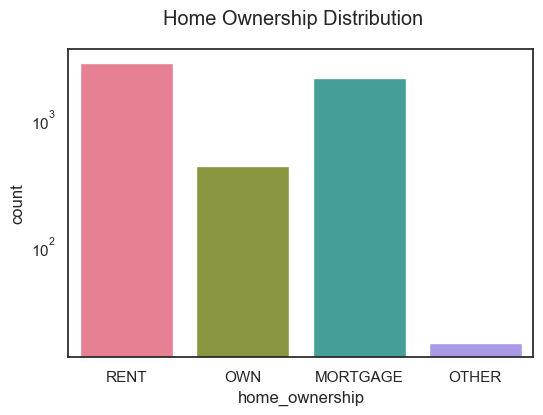

In [970]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'], palette="husl")
plt.suptitle('Home Ownership Distribution')
plt.show()

#### Observation : Loan borrowers have mostly have rented or mortgaged houses.

### * Loan Verification

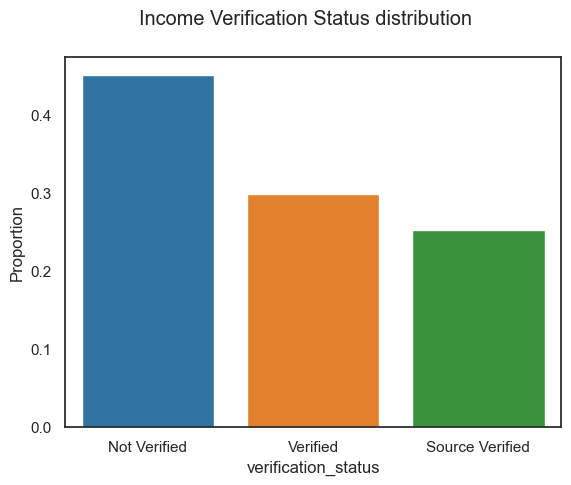

In [971]:
var="verification_status"
prob_df = loan_df["verification_status"].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.suptitle('Income Verification Status distribution')
plt.show()

In [972]:
loan_df['verification_status'].value_counts(normalize=True) * 100

Not Verified       45.067147
Verified           29.771563
Source Verified    25.161290
Name: verification_status, dtype: float64

#### Observation : Most of the loans were disbursed without verification of applicants

### * Employment Length

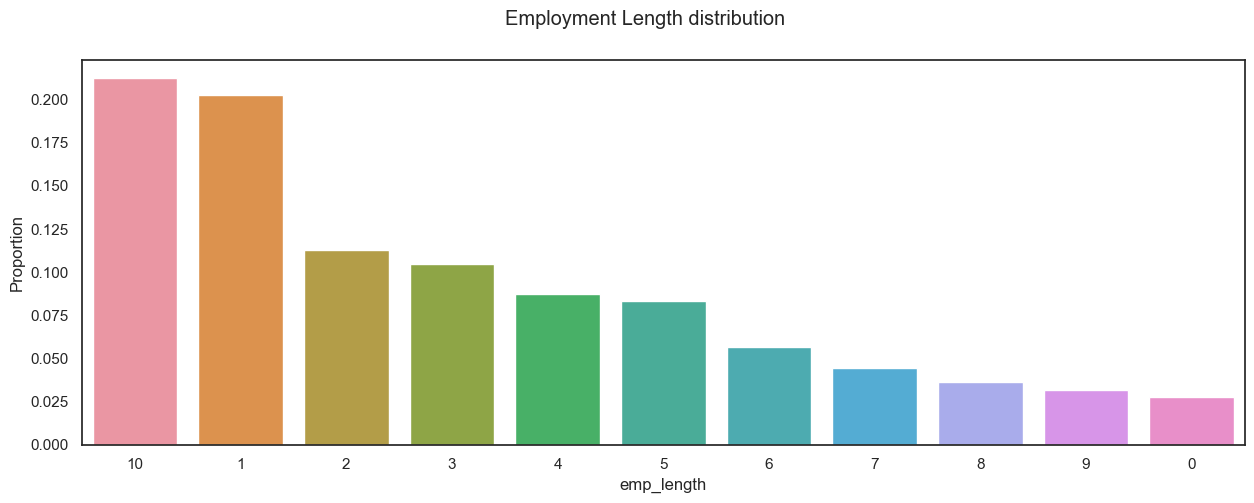

In [973]:
var="emp_length"
prob_df = loan_df["emp_length"].value_counts(normalize=True).reset_index()
plt.figure(figsize=(15,5))
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.suptitle('Employment Length distribution')
plt.show()

#### Observation: Data reveals a diverse distribution of borrower employement lengths,with most borrowers having 10+ years and second most borrowers having less than 1 year, which can influence loan eligibility and risk assessment.

### * Public Derogatory Records

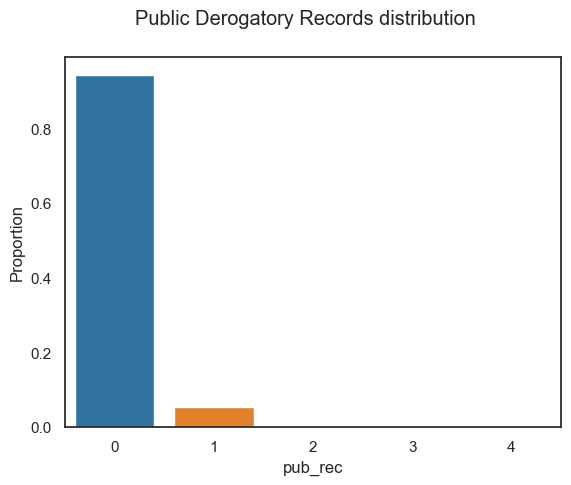

In [974]:
var="pub_rec"
prob_df = loan_df["pub_rec"].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.suptitle('Public Derogatory Records distribution')
plt.show()

In [975]:
loan_df['pub_rec'].value_counts(normalize=True) * 100

0    94.453828
1     5.396650
2     0.127371
3     0.016614
4     0.005538
Name: pub_rec, dtype: float64

#### Observation : Around 94% borrowers have no public derogatory records

### * Public Record Bankruptcies

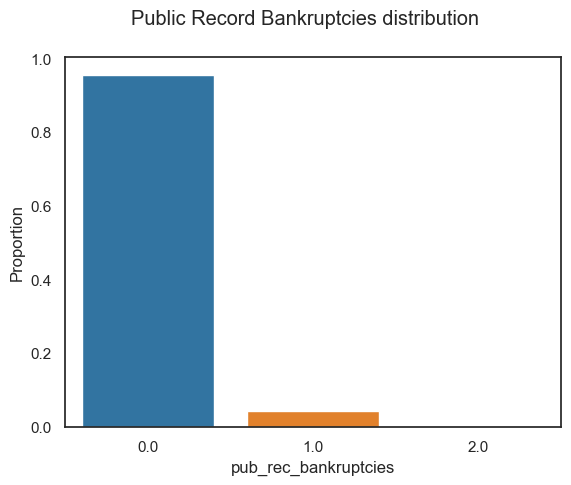

In [976]:
var="pub_rec_bankruptcies"
prob_df = loan_df["pub_rec_bankruptcies"].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.suptitle('Public Record Bankruptcies distribution')
plt.show()

In [977]:
loan_df['pub_rec_bankruptcies'].value_counts(normalize=True) * 100

0.0    95.518515
1.0     4.467383
2.0     0.014102
Name: pub_rec_bankruptcies, dtype: float64

#### Observation : Nearly 96% of borrowers have no recorded instances of Public Record Bankruptcies.

### * Grade

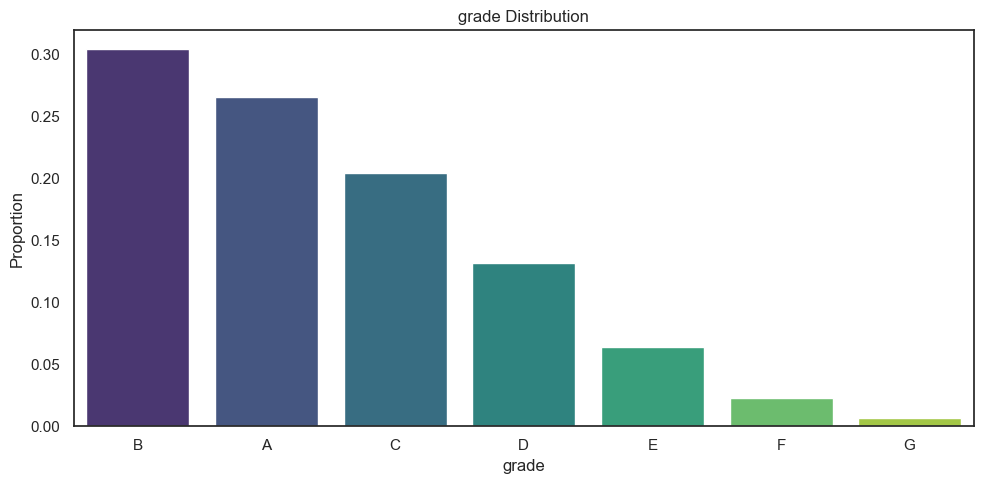

In [978]:
var = 'grade'
prob_df = loan_df[var].value_counts(normalize=True).reset_index()

# Bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='index', y=var, data=prob_df, palette='viridis')
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var + ' Distribution')

plt.tight_layout()  
plt.show()

#### Observation: The majority of loans are categorized as A and B grades.

### * Sub Grade

In [979]:
#Sub_grade
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
loan_df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

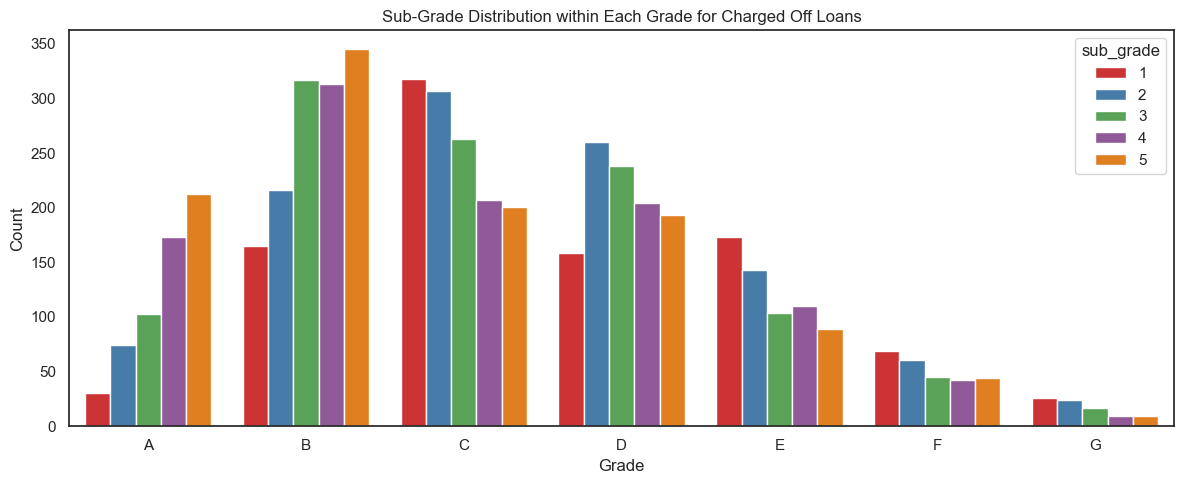

In [980]:
fig, ax = plt.subplots(figsize=(12, 5))
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.set_palette('Set1')

# Countplot
sns.countplot(x='grade', hue='sub_grade', data=loan_df[loan_df.loan_status == 'Charged Off'], order=grade_order, ax=ax)

ax.set_xlabel('Grade')
ax.set_ylabel('Count')
ax.set_title('Sub-Grade Distribution within Each Grade for Charged Off Loans')

plt.tight_layout()
plt.show()

### * Debt-to-Income Ratio (Dti)

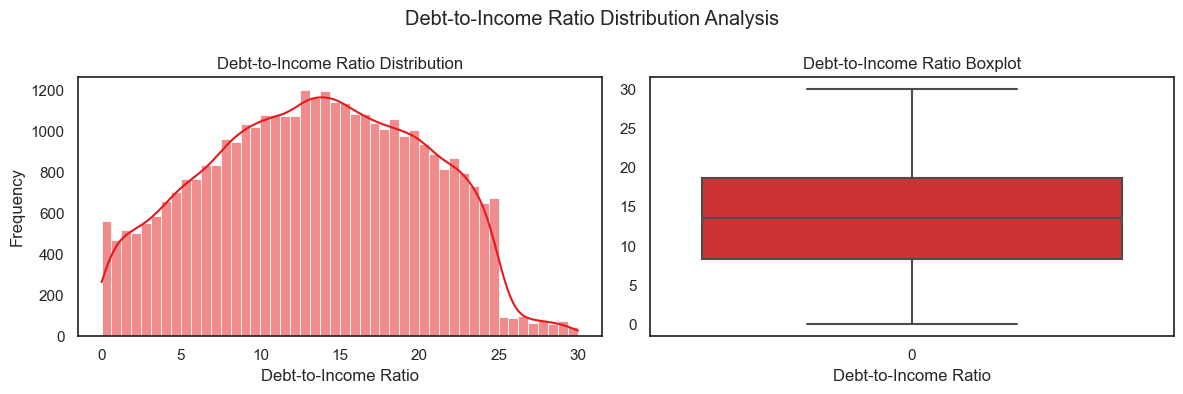

In [981]:
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(loan_df['dti'], kde=True)
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=loan_df['dti'])
plt.title('Debt-to-Income Ratio Boxplot')
plt.xlabel('Debt-to-Income Ratio')
plt.suptitle('Debt-to-Income Ratio Distribution Analysis')

plt.tight_layout()
plt.show()


In [982]:
loan_df.dti.describe(percentiles=[0.05,0.10,0.25,0.50,0.75,0.9,0.95])

count    36115.000000
mean        13.430549
std          6.662977
min          0.000000
5%           2.200000
10%          4.160000
25%          8.330000
50%         13.550000
75%         18.700000
90%         22.380000
95%         23.850000
max         29.990000
Name: dti, dtype: float64

#### Observation : We have almost a normal distribution for the Debt to interest ratio. Loans were only given to borrowers whose DTI is less than 30

# Segmented Univariate Analysis

#### The intention is to examine and understand the distribution and characteristics of a single variable within distinct subgroups

### Loan Amount

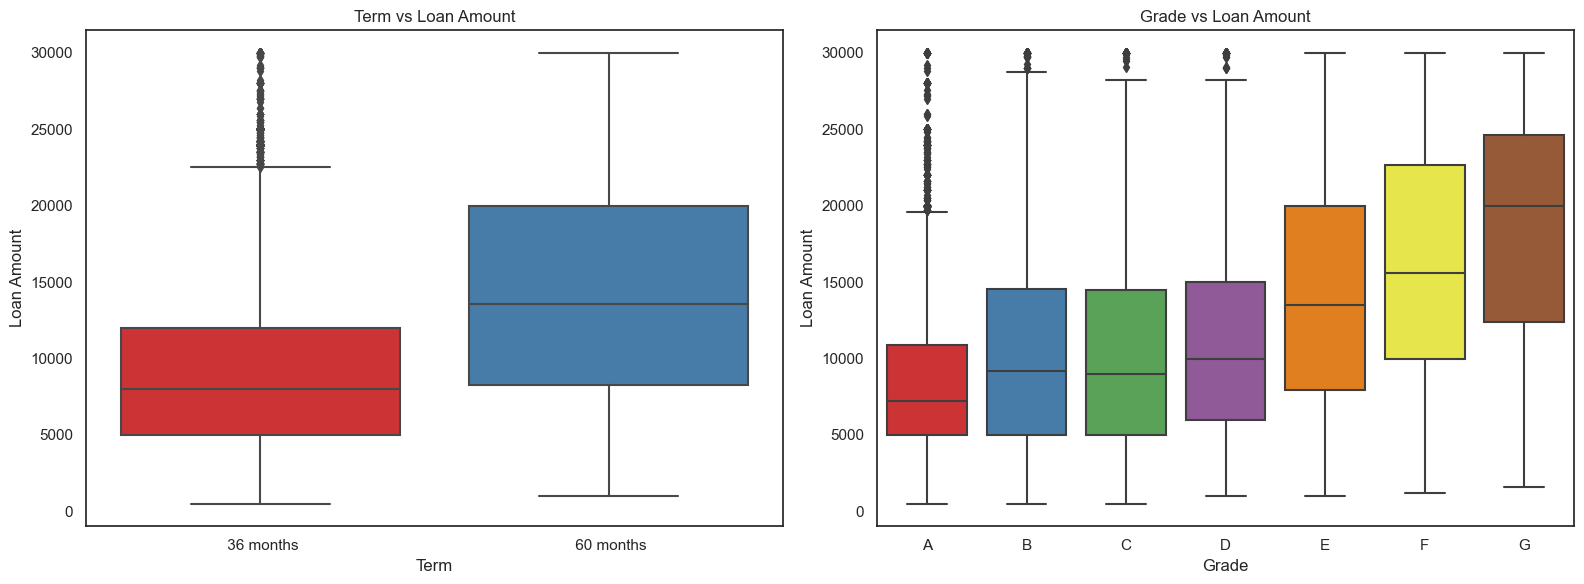

In [983]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Terms vs Loan Amount
sns.boxplot(x='term', y='loan_amnt', data=loan_df, ax=axes[0])
axes[0].set_title('Term vs Loan Amount')
axes[0].set_xlabel('Term')
axes[0].set_ylabel('Loan Amount')

# Plot 2: Grade vs Loan Amount
grade_ord = loan_df['grade'].unique()
grade_ord.sort()
sns.boxplot(x='grade', y='loan_amnt', order=grade_ord, data=loan_df, ax=axes[1])
axes[1].set_title('Grade vs Loan Amount')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Loan Amount')

plt.tight_layout()
plt.show()

#### Observation: 
#### Higher amount loans have tenure of 60 months.
#### Loans with lower LC grades tend to be associated with higher loan amounts

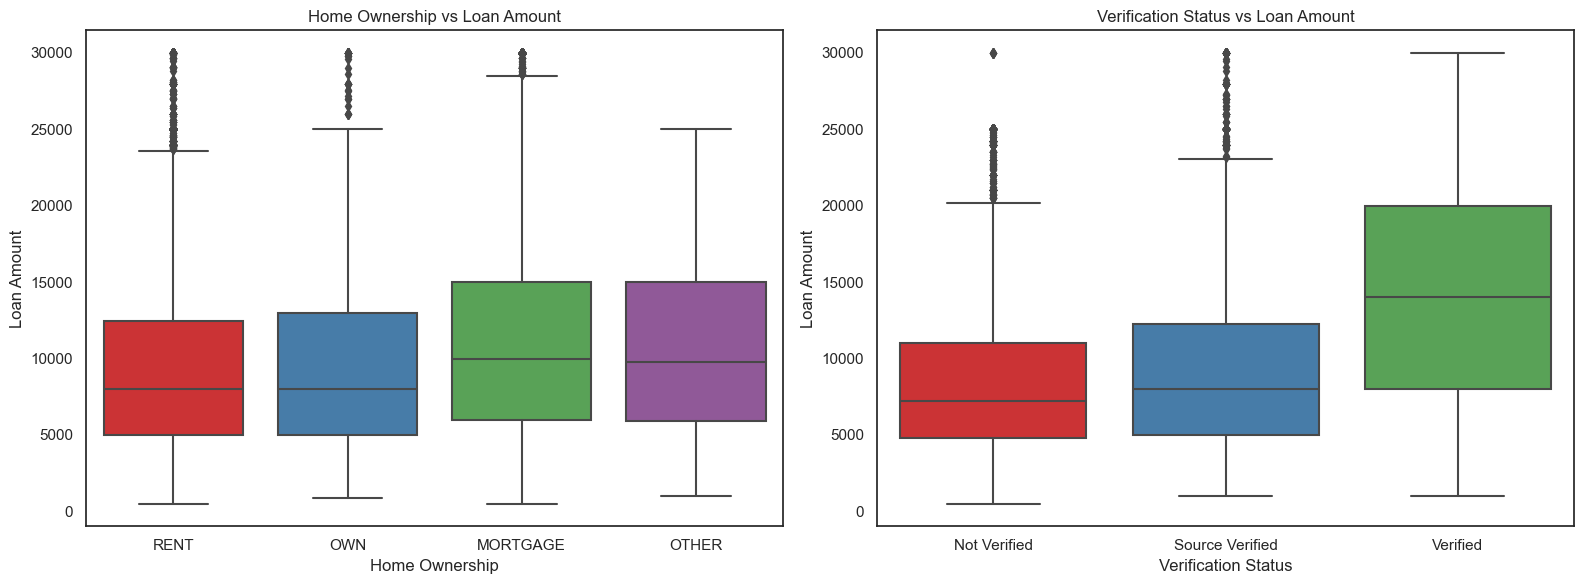

In [984]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: home_ownership vs Loan Amount
sns.boxplot(x='home_ownership', y='loan_amnt', data=loan_df, ax=axes[0])
axes[0].set_title('Home Ownership vs Loan Amount')
axes[0].set_xlabel('Home Ownership')
axes[0].set_ylabel('Loan Amount')

# Plot 2: verification_status vs Loan Amount
verification_status_ord = loan_df['verification_status'].unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y='loan_amnt', order=verification_status_ord, data=loan_df, ax=axes[1])
axes[1].set_title('Verification Status vs Loan Amount')
axes[1].set_xlabel('Verification Status')
axes[1].set_ylabel('Loan Amount')

plt.tight_layout()
plt.show()

#### Observation: 
#### Most loans are obtained by homeowners with mortgage status.
#### And most of the loan amounts disbursed are with verified status.

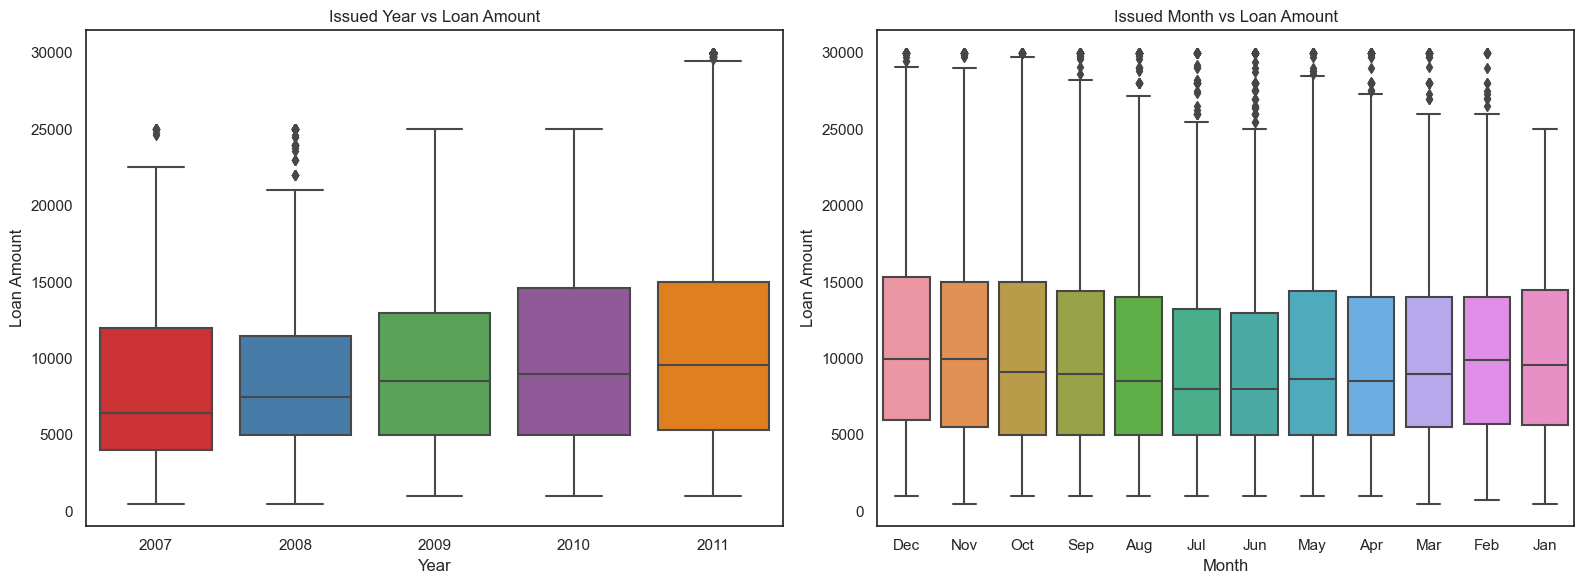

In [985]:
plt.figure(figsize=(16, 6))

# Subplot 1: Boxplot for Issued Year vs. Loan Amount
plt.subplot(1, 2, 1)
sns.boxplot(x='issue_year', y='loan_amnt', data=loan_df)
plt.title('Issued Year vs Loan Amount')
plt.xlabel('Year')
plt.ylabel('Loan Amount')

# Subplot 2: Boxplot for Issued Month vs. Loan Amount
plt.subplot(1, 2, 2)
sns.boxplot(x='issue_month', y='loan_amnt', data=loan_df)
plt.title('Issued Month vs Loan Amount')
plt.xlabel('Month')
plt.ylabel('Loan Amount')

plt.tight_layout()
plt.show()

#### Observation:
#### There is an annual increase in the loan amount.
#### Loan amounts taken are highest in December, followed by November.

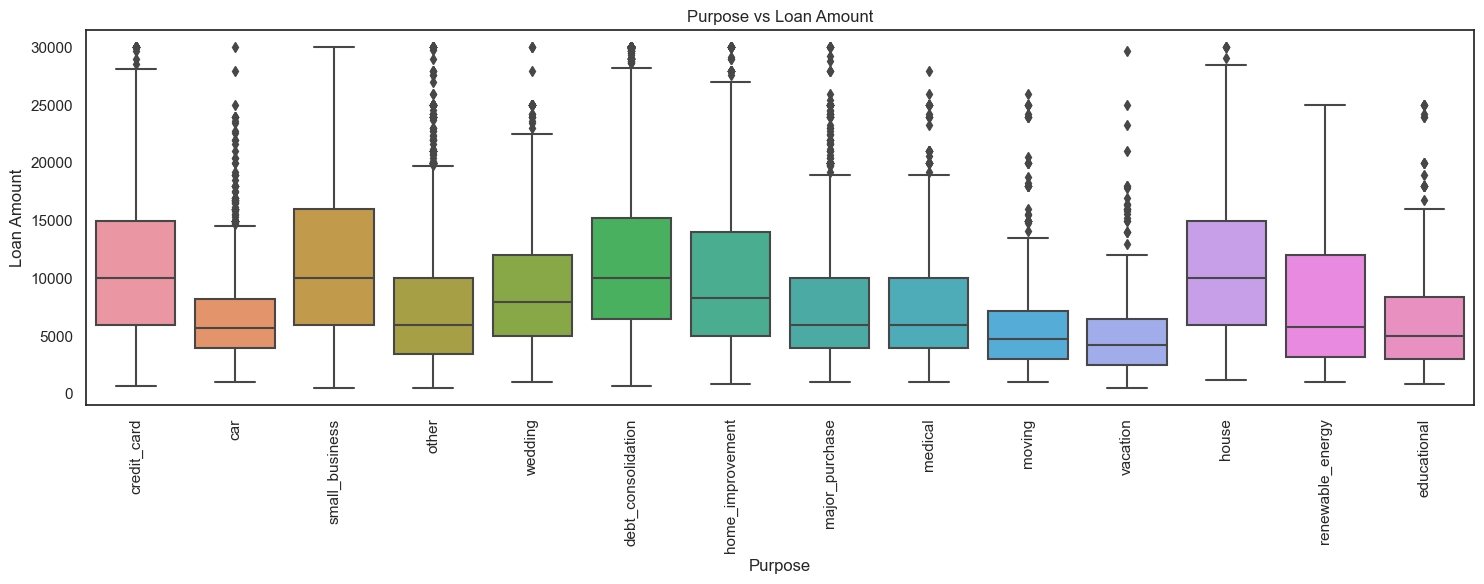

In [986]:
plt.figure(figsize=(15, 6))

# Box plot: Purpose vs Loan Amount
sns.boxplot(x='purpose', y='loan_amnt', data=loan_df)
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Purpose vs Loan Amount')

plt.tight_layout()
plt.show()

#### Observation: Small business loans account for the majority of the loan amount.

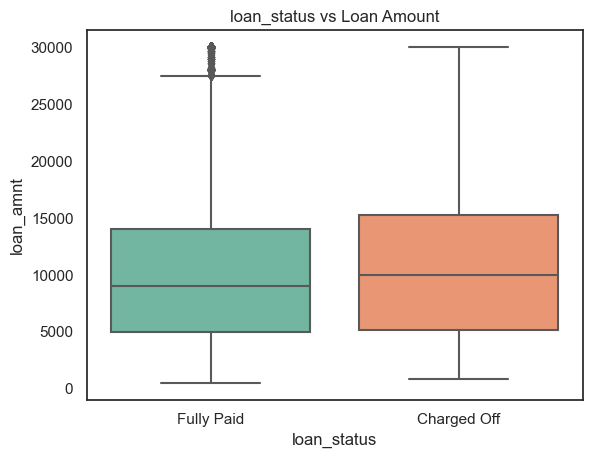

In [987]:
# Box plot: loan_status vs Loan Amount
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df, palette="Set2")
plt.title('loan_status vs Loan Amount')
plt.show()

#### Observation: The average charged-off loan amount was higher compared to fully paid loans.

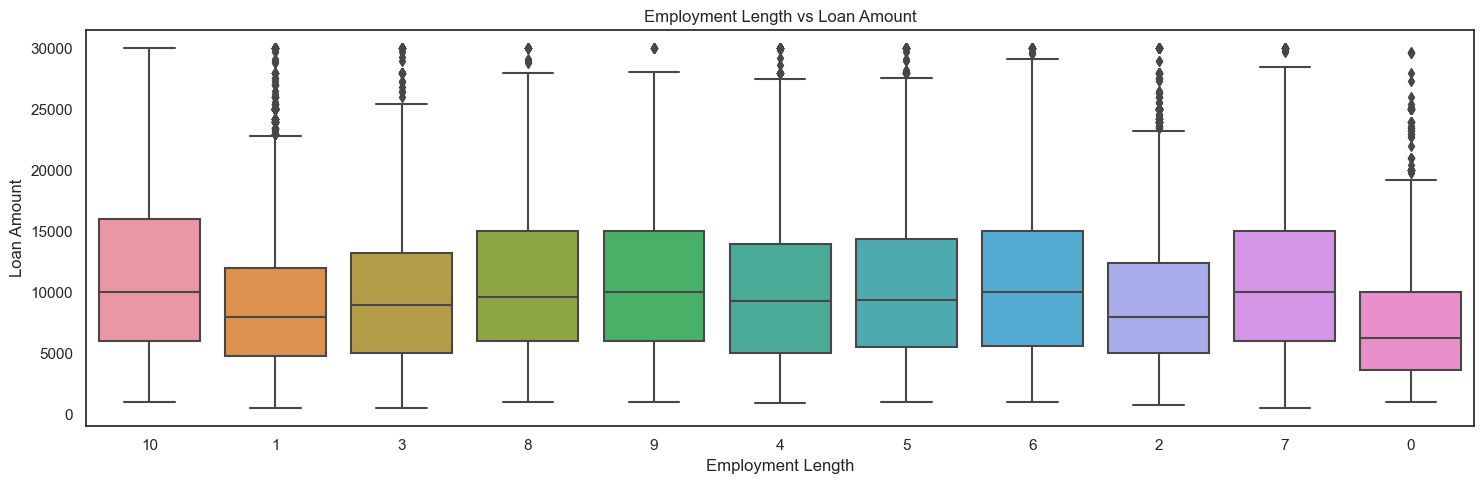

In [988]:
plt.figure(figsize=(15, 5))
# Box plot: Employment Length vs Loan Amount
sns.boxplot(x='emp_length', y='loan_amnt', data=loan_df)
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.title('Employment Length vs Loan Amount')

plt.tight_layout()
plt.show()

#### Observation: Experienced borrowers have taken larger loans.

### Interest rate

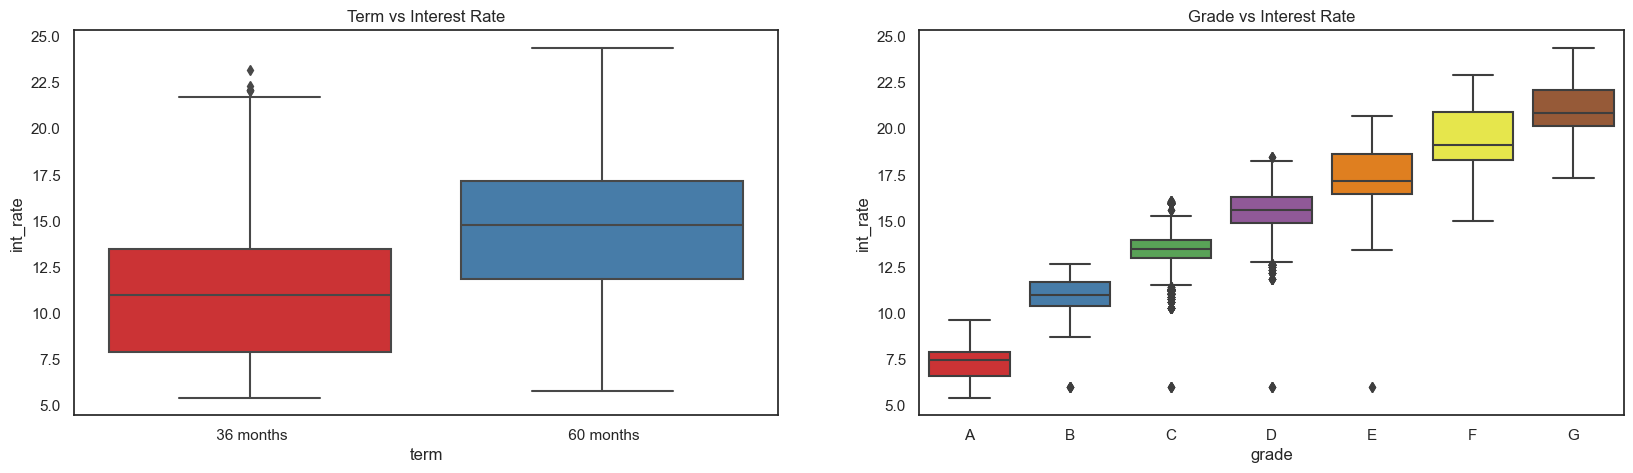

In [989]:
plt.figure(figsize=(20, 5))

# Subplot 1: Term vs Interest Rate
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', data=loan_df)
plt.title('Term vs Interest Rate')

# Subplot 2: Grade vs Interest Rate
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y='int_rate', order=grade_ord, data=loan_df)

plt.show()

#### Observation: 
#### The average interest rate is higher for longer-tenured loans, ie 60 months
#### Lower-graded loans (LC) have higher interest rates.

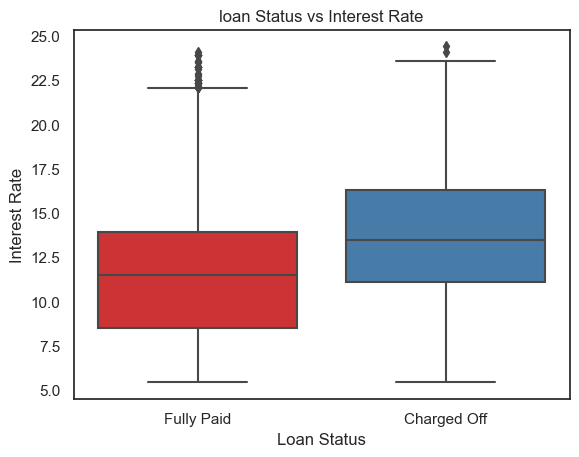

In [990]:
# Boxplot: loan Status vs Interest Rate
sns.boxplot(x='loan_status', y='int_rate', data=loan_df)
plt.title('loan Status vs Interest Rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

#### Observation : charged of loans had higher interest rates.

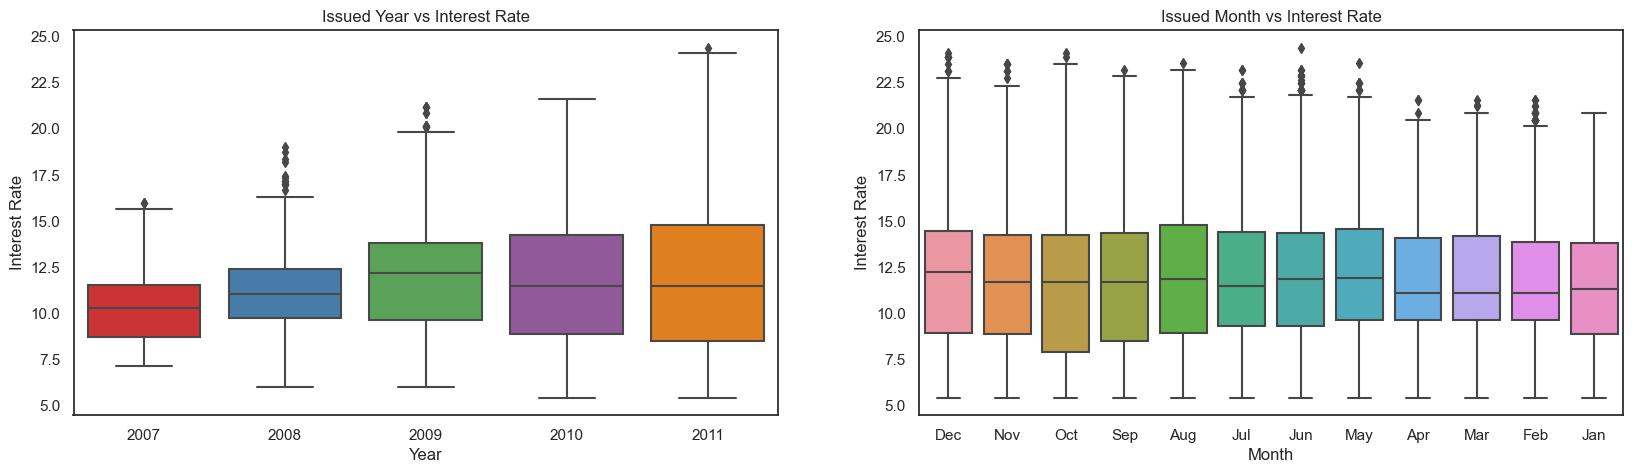

In [991]:
plt.figure(figsize=(20, 5))

# Subplot 1: Issued Year vs Interest Rate
plt.subplot(121)
sns.boxplot(x='issue_year', y='int_rate', data=loan_df)
plt.title('Issued Year vs Interest Rate')
plt.xlabel('Year')
plt.ylabel('Interest Rate')

# Subplot 2: Issued Month vs Interest Rate
plt.subplot(122)
sns.boxplot(x='issue_month', y='int_rate', data=loan_df)
plt.title('Issued Month vs Interest Rate')
plt.xlabel('Month')
plt.ylabel('Interest Rate')

plt.show()

#### Observation: 
#### Interest rates increased annually until 2009, followed by a decrease in 2010 and 2011, maintaining a similar average interest rate. However, there was a consistent annual increase in loan distribution during this period.
#### The average interest rate appears to be slightly higher for loans disbursed in December.

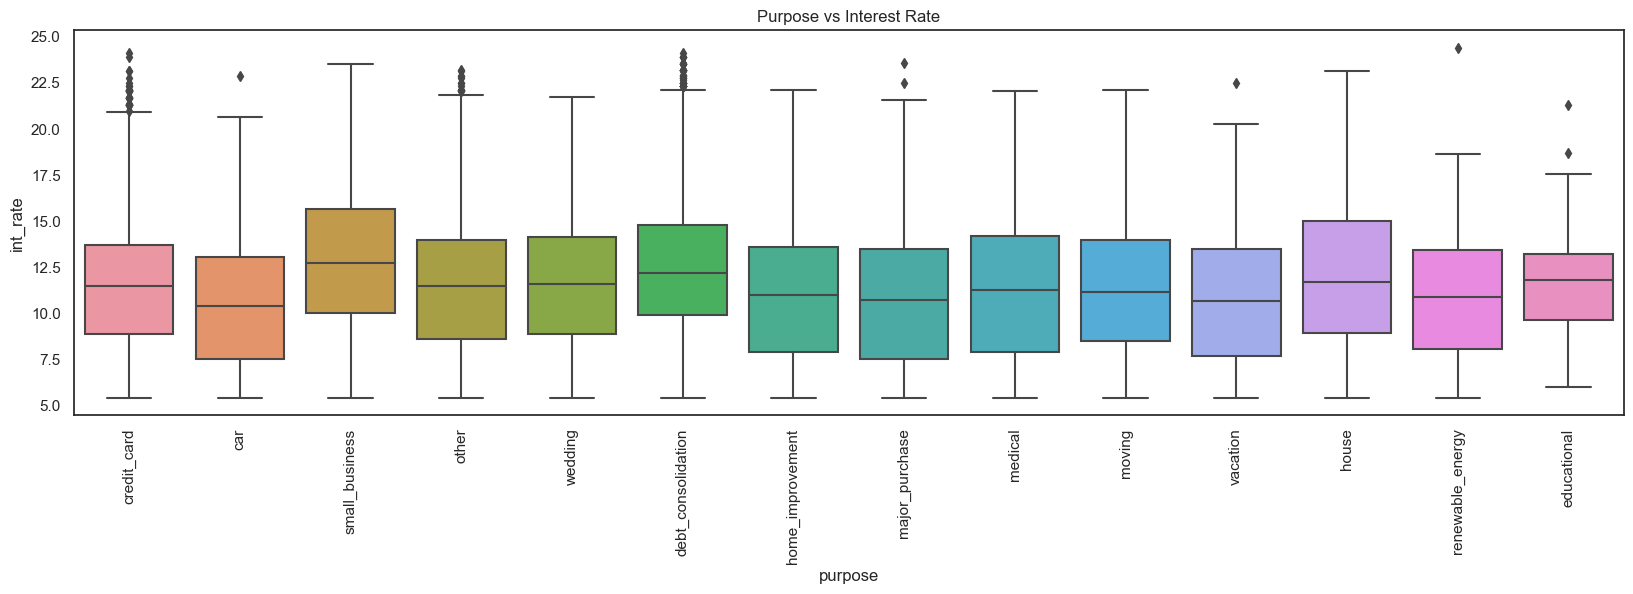

In [992]:
#Box plot: Purpose vs Interest Rate
plt.figure(figsize=(20, 5))
sns.boxplot(x='purpose', y='int_rate', data=loan_df)
plt.xticks(rotation=90)
plt.title('Purpose vs Interest Rate')
plt.show()

#### Observation: Small business loans tend to have higher interest rates.

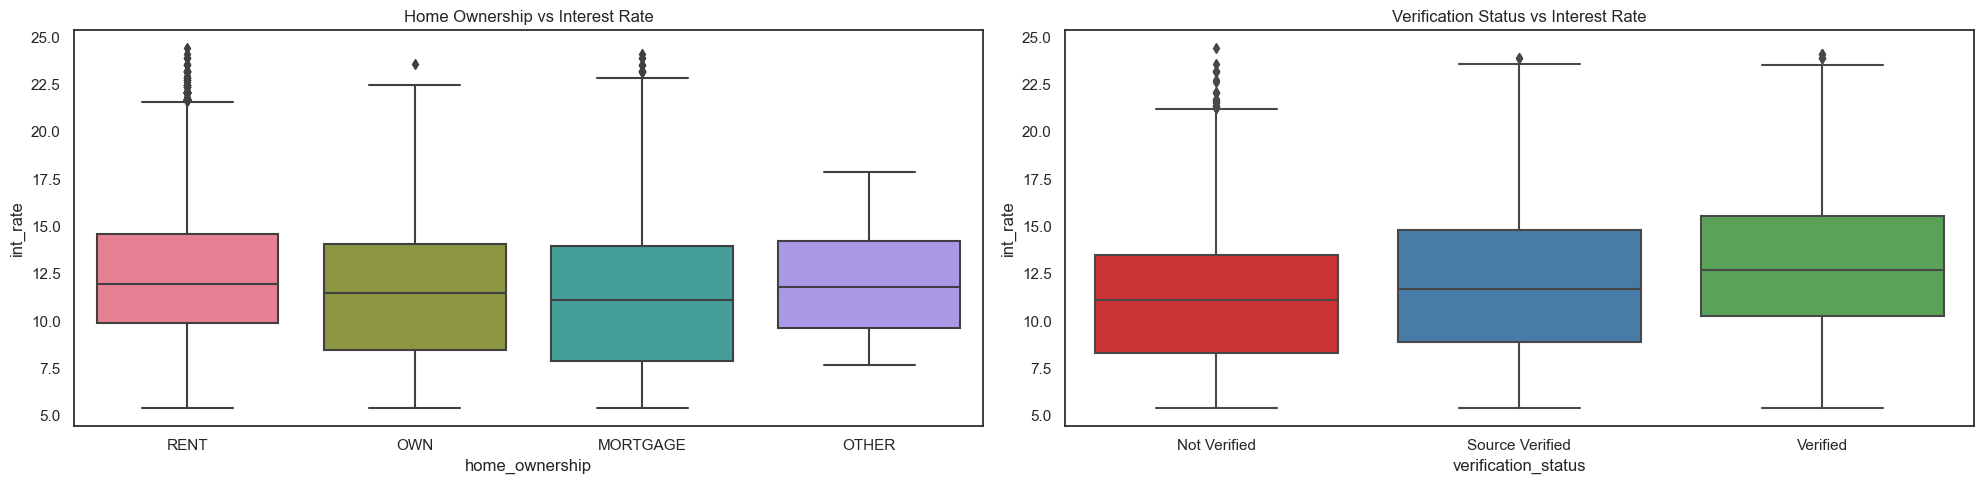

In [993]:
plt.figure(figsize=(20, 5))

# Subplot 1: home_ownership vs Interest Rate
plt.subplot(121)
sns.boxplot(x='home_ownership', y='int_rate', data=loan_df, palette="husl")
plt.title('Home Ownership vs Interest Rate')

# Subplot 2: verification_status vs Interest Rate
plt.subplot(122)
verification_status_ord = loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y='int_rate', order=verification_status_ord, data=loan_df)
plt.title('Verification Status vs Interest Rate')

plt.tight_layout()
plt.show()

### DTI

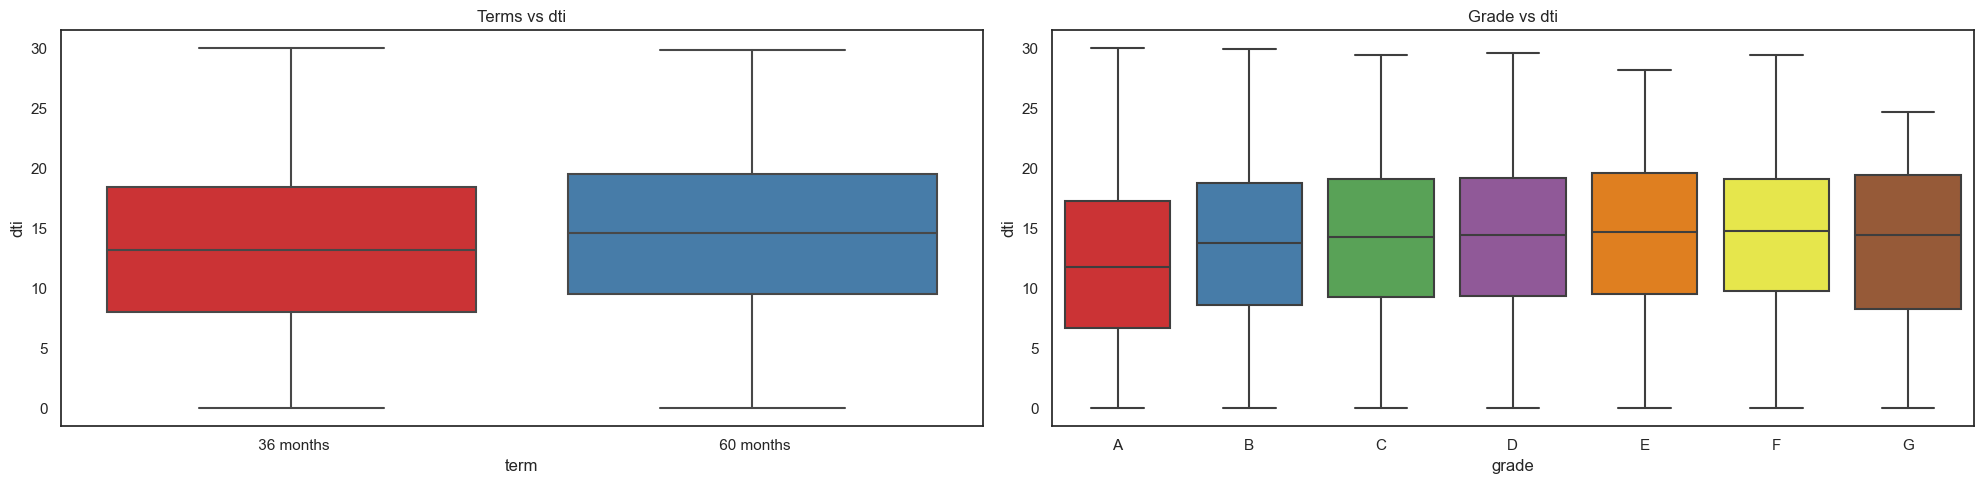

In [994]:
plt.figure(figsize=(20, 5))
# Subplot 1: Terms vs dti
plt.subplot(121)
sns.boxplot(x='term', y='dti', data=loan_df)
plt.title('Terms vs dti')

# Subplot 2: Grade vs dti
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y='dti', order=grade_ord, data=loan_df)

plt.tight_layout()
plt.show()

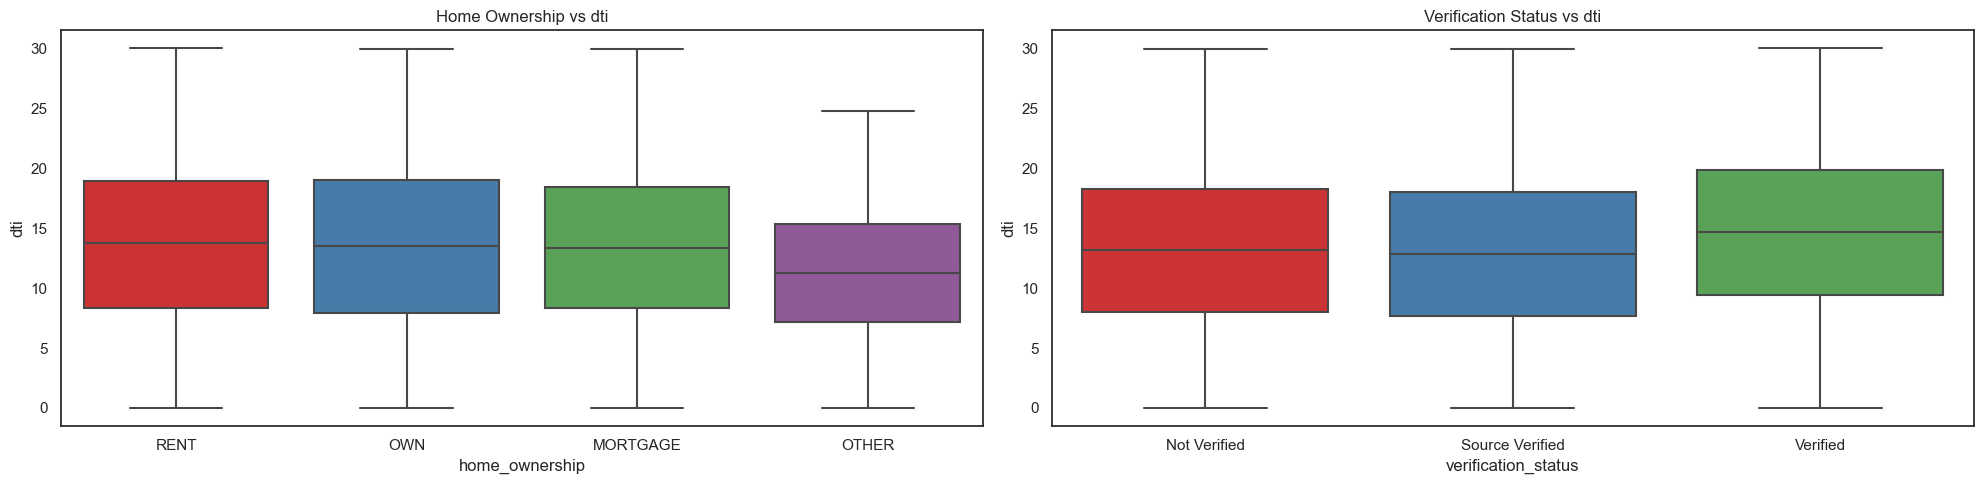

In [995]:
plt.figure(figsize=(20, 5))

# Subplot 1: home_ownership vs dti
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', data=loan_df)
plt.title('Home Ownership vs dti')

# Subplot 2: verification_status vs dti
plt.subplot(122)
plt.title('Verification Status vs dti')
verification_status_ord = loan_df.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y='dti', order=verification_status_ord, data=loan_df)

plt.tight_layout()
plt.show()

#### Observation: The Debt-to-Income (DTI) ratio is slightly higher for verified loans.

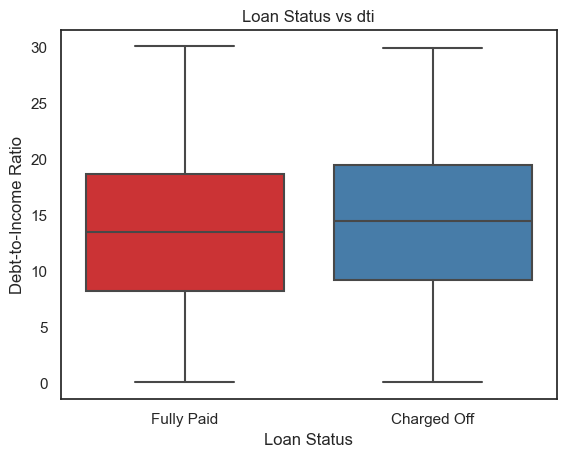

In [996]:
sns.boxplot(x='loan_status', y='dti', data=loan_df)
plt.title('Loan Status vs dti')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

#### Observation: The Debt-to-Income (DTI) ratio is slightly higher for loans that have been charged off.

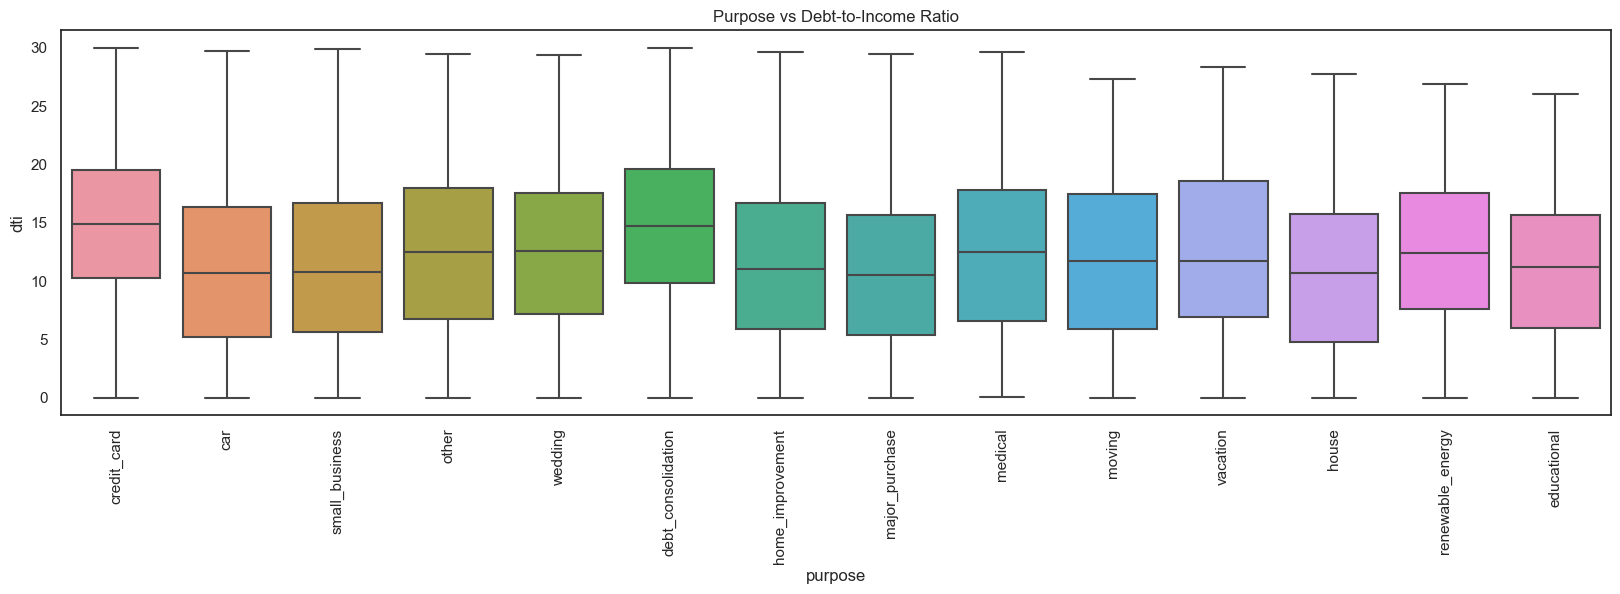

In [997]:
plt.figure(figsize=(20, 5))

sns.boxplot(x='purpose', y='dti', data=loan_df)
plt.xticks(rotation=90)
plt.title('Purpose vs Debt-to-Income Ratio')
plt.xlabel('purpose')
plt.ylabel('dti')
plt.show()

### pub_rec

In [998]:
df = loan_df.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
proportions = df.groupby('pub_rec')['id'].transform(lambda x: x / x.sum())
df['proportion'] = proportions

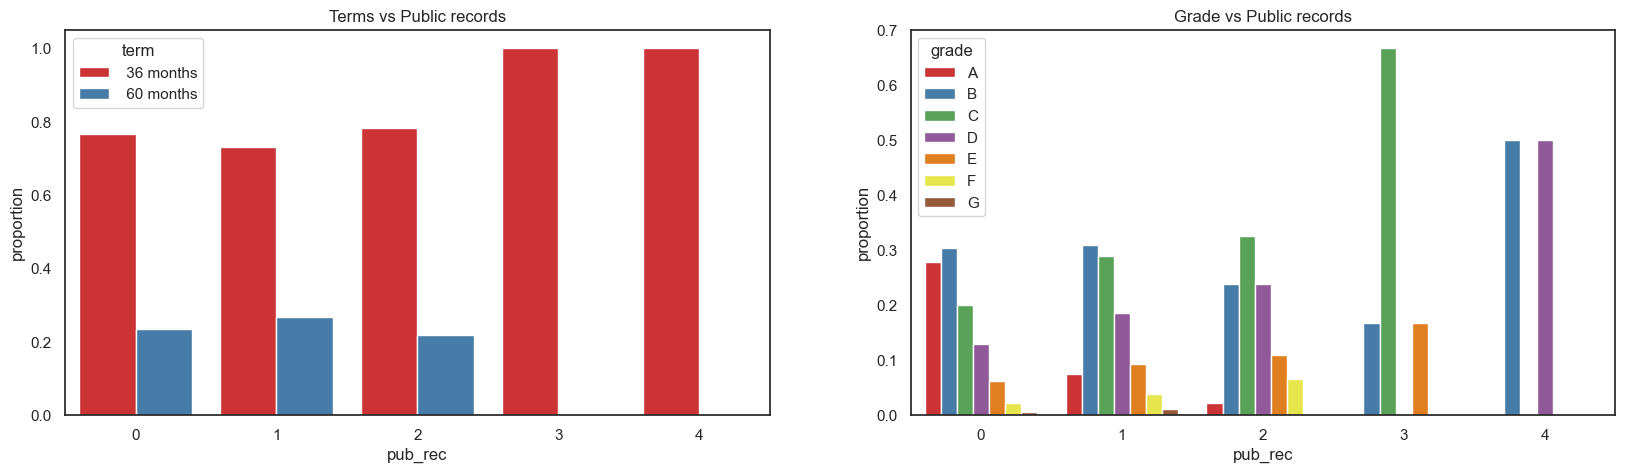

In [999]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = loan_df.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec')['id'].transform(lambda x: x / x.sum())

plt.subplot(122)
plt.title('Grade vs Public records')

grade_ord = df['grade'].unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

plt.show()

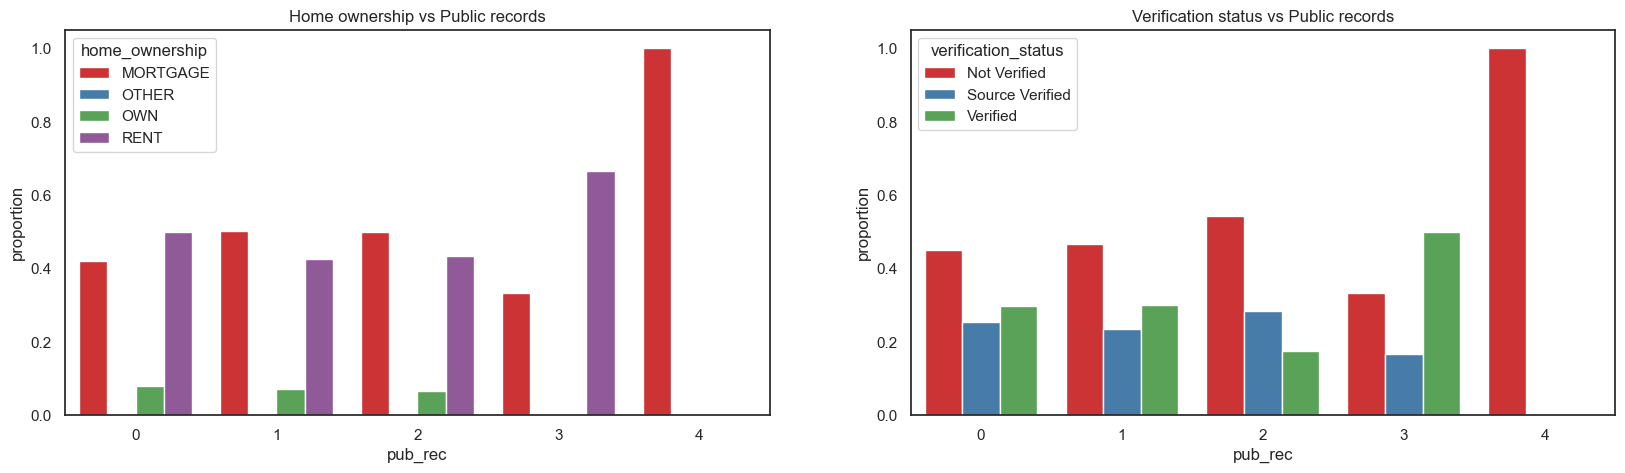

In [1000]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = loan_df.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = loan_df.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records')
plt.show()

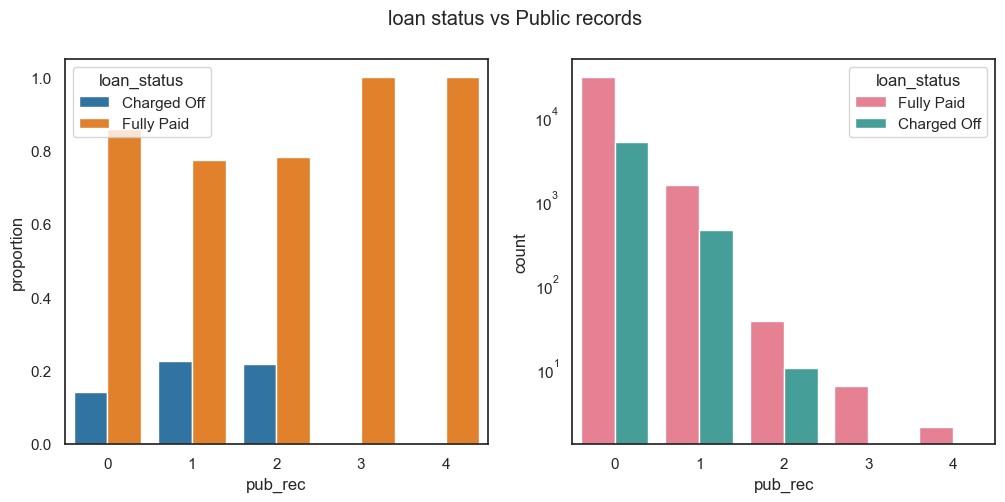

In [1001]:
#Proportion of values for each category
df = loan_df.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df, palette="tab10")

plt.subplot(122)
sns.countplot(x='pub_rec', hue='loan_status', data=loan_df, palette="husl")
plt.yscale('log')
plt.suptitle('loan status vs Public records')

plt.show()

#### Observation: 
#### Most of the charged-off loans are from borrowers with no derogatory public records.

### pub_rec_bankruptcies

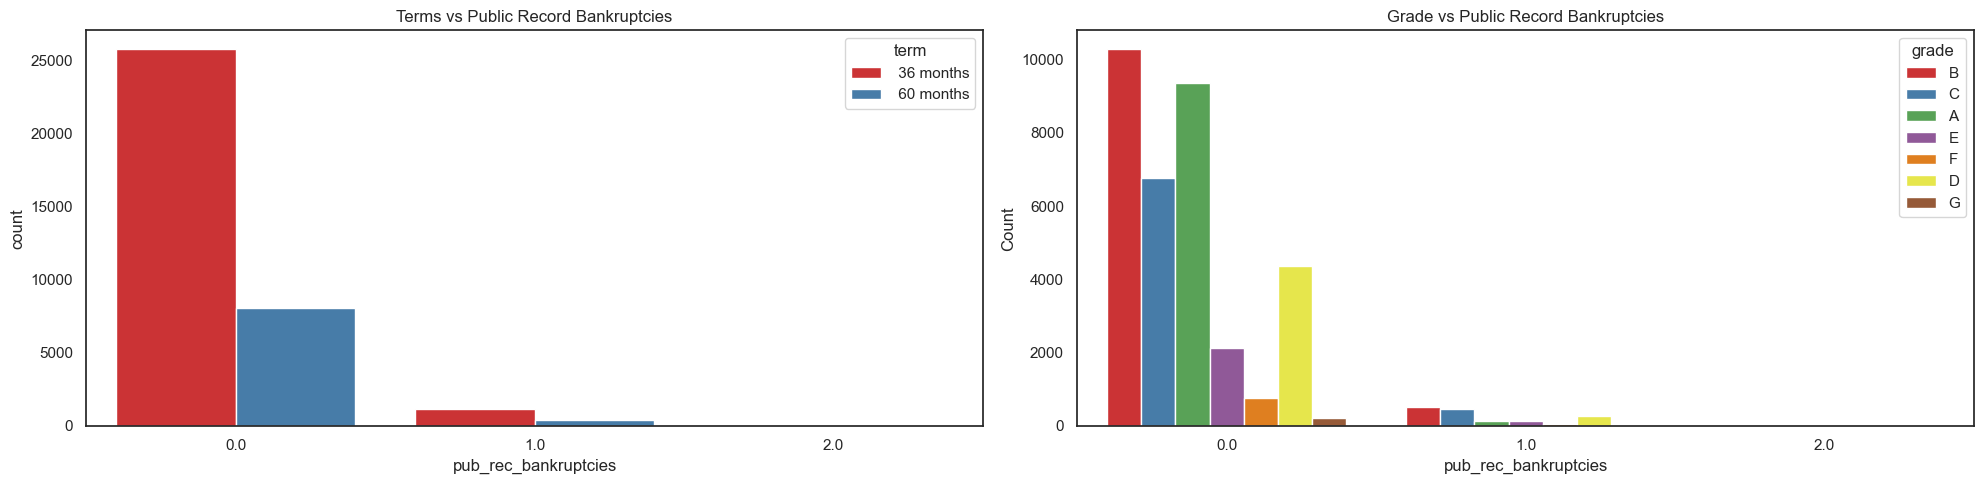

In [1002]:
plt.figure(figsize=(20, 5))

# Subplot 1: Terms vs Public record bankruptcies
plt.subplot(121)
sns.countplot(x='pub_rec_bankruptcies', hue='term', data=loan_df)
plt.title('Terms vs Public Record Bankruptcies')

# Subplot 2: Grade vs Public record bankruptcies
plt.subplot(122)
sns.countplot(x='pub_rec_bankruptcies', hue='grade', data=loan_df)
plt.ylabel('Count')
plt.title('Grade vs Public Record Bankruptcies')

plt.tight_layout()
plt.show()

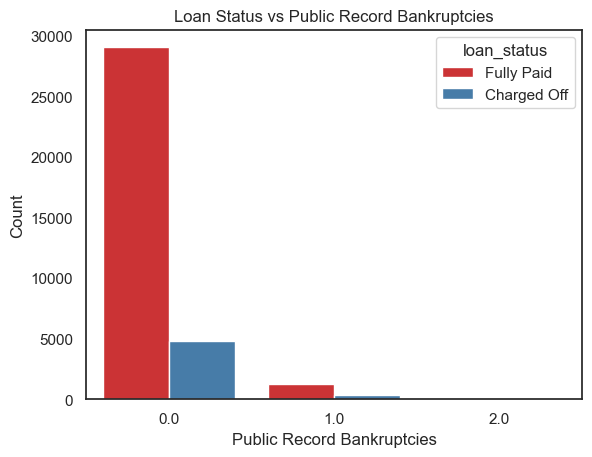

In [1003]:
sns.countplot(x='pub_rec_bankruptcies', hue='loan_status', data=loan_df)
plt.title('Loan Status vs Public Record Bankruptcies')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Count')
plt.show()

#### Observation: Most of the charged-off loans are from borrowers with no prior bankruptcies.

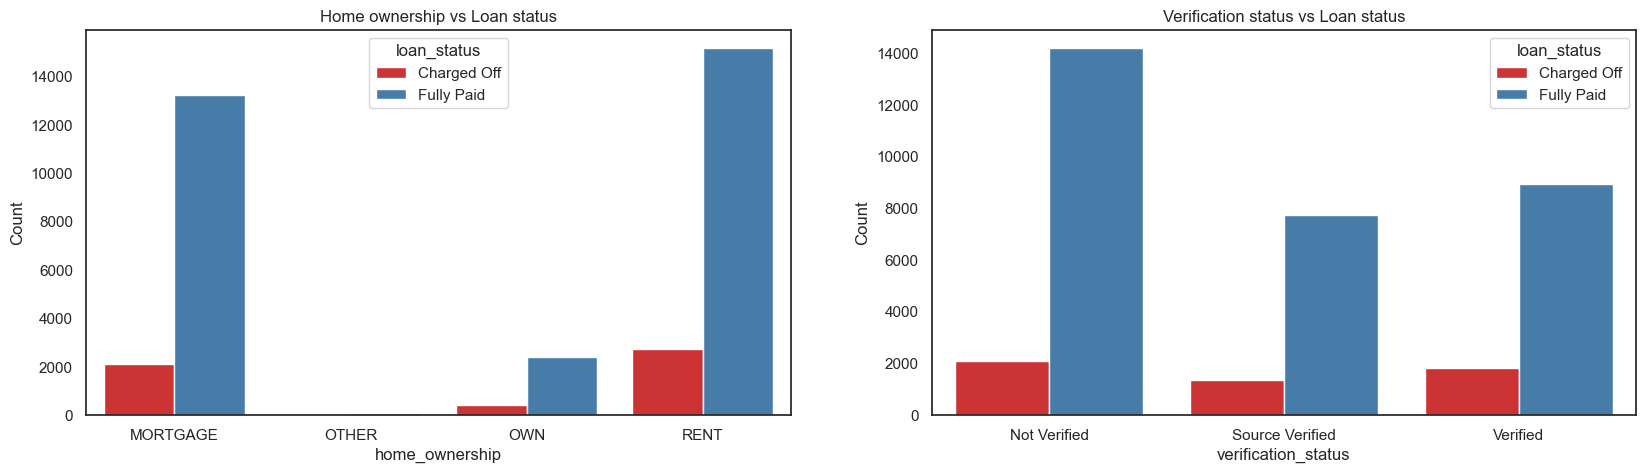

In [1004]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = loan_df.groupby(['home_ownership','loan_status'], as_index=False)['id'].count()
sns.barplot(x='home_ownership', y='id', hue='loan_status', data=df)
plt.title('Home ownership vs Loan status')
plt.ylabel('Count')

df = loan_df.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
plt.subplot(122)
sns.barplot(x='verification_status', y='id', hue='loan_status', data=df)
plt.ylabel('Count')

plt.title('Verification status vs Loan status')
plt.show()

#### Observation:
#### Most of the charged-off loans were taken by borrowers with a home ownership status of 'RENT,' followed by those with 'MORTGAGE'
#### Most of the charged-off loans were disbursed without verification.

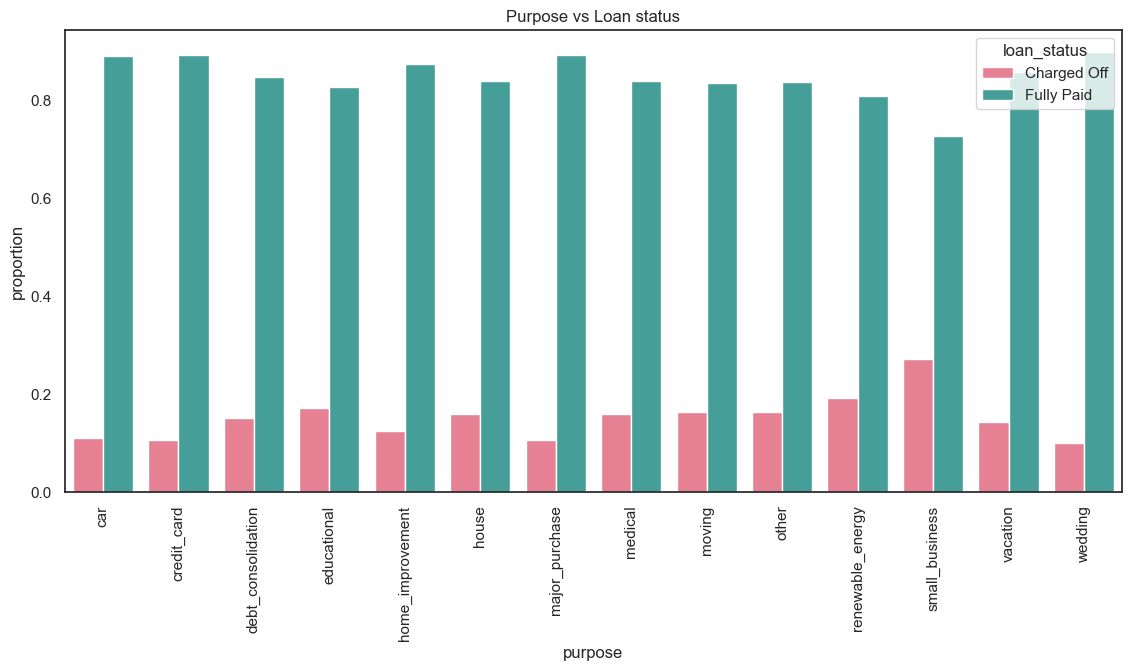

In [1005]:
plt.figure(figsize=(30,6))
plt.subplot(121)

df = loan_df.groupby(['purpose','loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('purpose').transform(lambda x: x/x.sum())
plt.xticks(rotation=90)
sns.barplot(x='purpose', y='proportion', hue='loan_status', data=df, palette="husl")
plt.title('Purpose vs Loan status')

plt.show()

#### Observation: The majority of charged-off loans are small business loans.

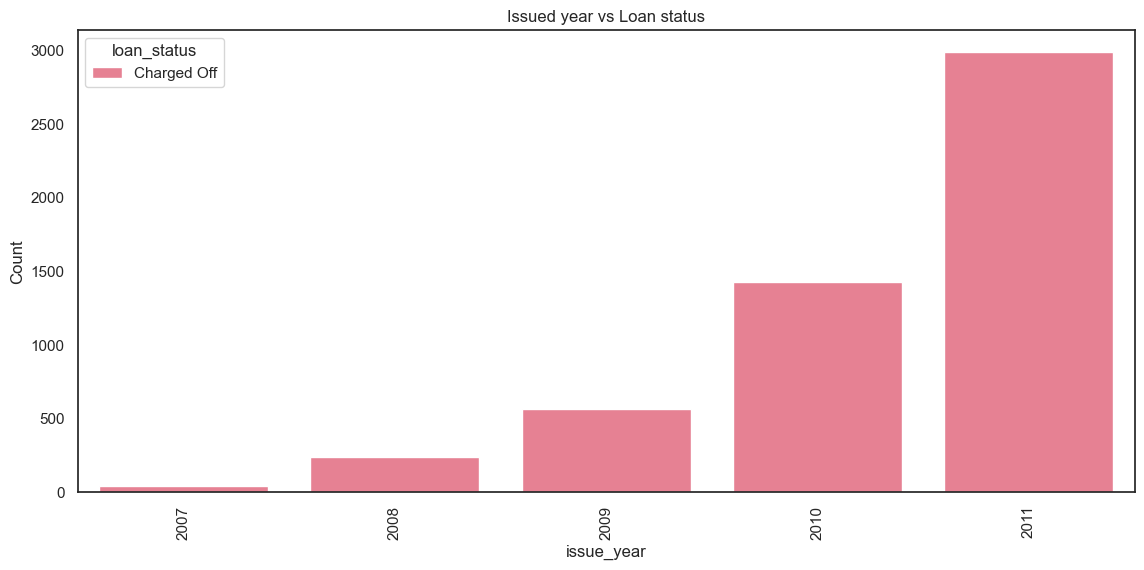

In [1006]:
plt.figure(figsize=(30, 6))
plt.subplot(121)

df = loan_df.groupby(['issue_year', 'loan_status'], as_index=False)['id'].count()
plt.xticks(rotation=90)
sns.barplot(x='issue_year', y='id', hue='loan_status', data=df[df["loan_status"]=="Charged Off"], palette="husl")
plt.title('Issued year vs Loan status')
plt.ylabel('Count')
plt.show()

#### Observations: There is a significant annual increase in charged-off loans.

# Bivariate Analysis

#### The intent here is to look at 2 variables and whether they influence the repayment.

Text(0, 0.5, 'Percentage of Total')

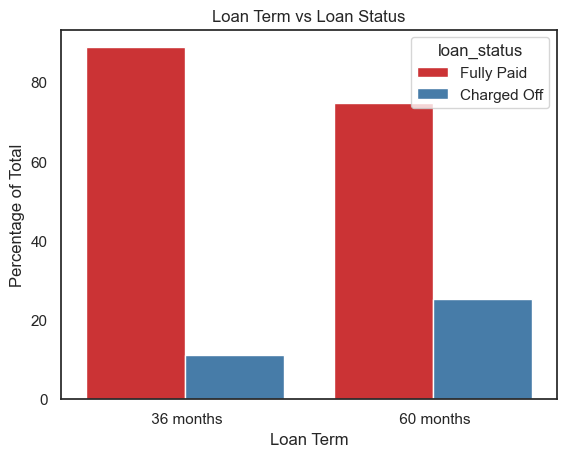

In [1007]:
another_df = loan_df.groupby(['term', 'loan_status'], as_index=False)['id'].count()
another_df['proportion'] = another_df.groupby('term').transform(lambda x: x/x.sum()*100)
sns.barplot(x='term', y='proportion', hue='loan_status', data=another_df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Loan Term vs Loan Status')
plt.xlabel('Loan Term')
plt.ylabel('Percentage of Total')


### Observation

The analysis shows that higher the loan term, the higher the chance of default

## How does interest rate and annual income impact defaults

<Axes: title={'center': 'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

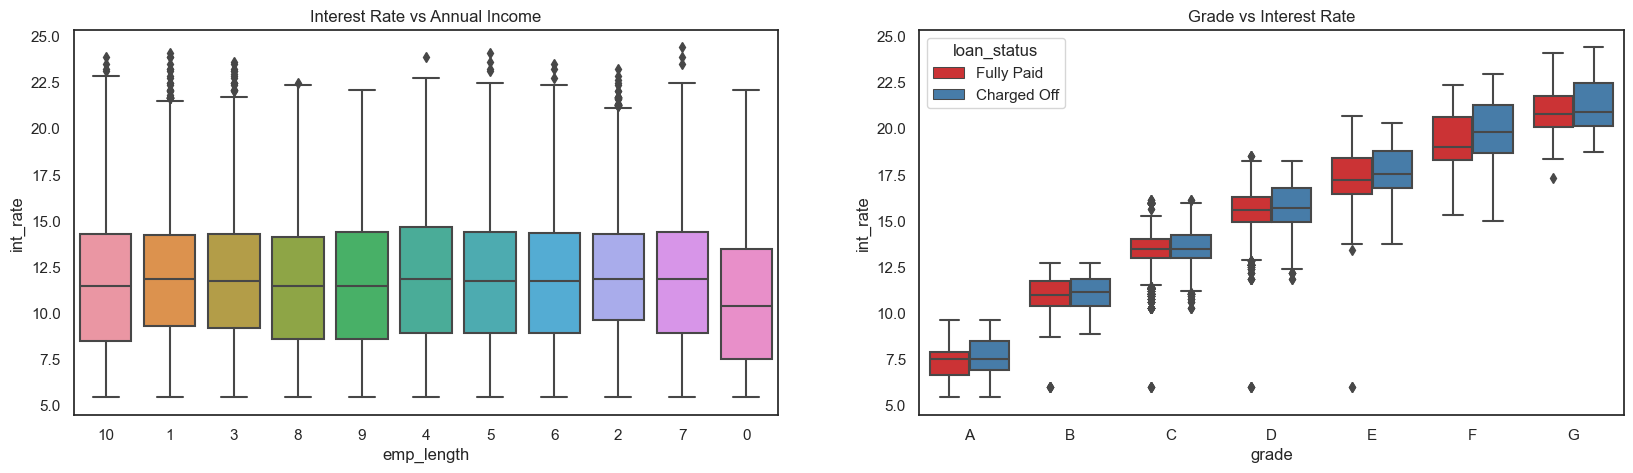

In [1008]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='int_rate', data=loan_df)
plt.title('Interest Rate vs Annual Income')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=loan_df.int_rate, hue='loan_status', order = grade_ord, data=loan_df)

In [1009]:
loan_df['annual_income_groups'].value_counts()

50k-100k     17368
0-50k        15383
100k-150k     3364
150k-200k        0
200-250k         0
250k-300k        0
>300k            0
Name: annual_income_groups, dtype: int64

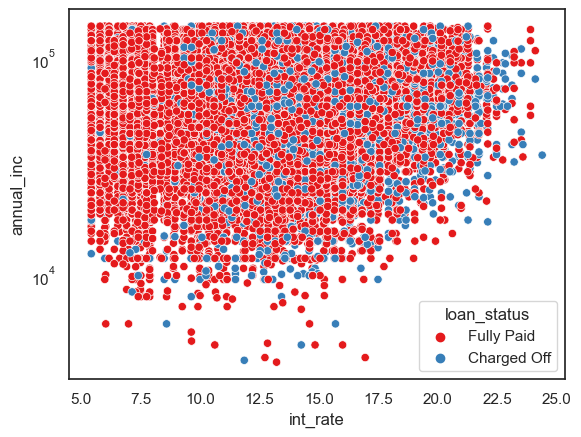

In [1010]:
graph = sns.scatterplot(x='int_rate', y='annual_inc', hue='loan_status', data=loan_df)
plt.yscale('log')

## Observation

__The median interest rate for charged off loans is higher for Grades D, E & F__
<br>
If the loan is given to a grade D, E or F category borrower, there is a higher chance of delinquency.

In [1011]:
#default_totals = loan_df.groupby(['term','grade','loan_status'])['id'].count().reset_index()
# default_totals['ratios'] = default_totals.groupby(['term','grade']).transform(lambda x: x/x.sum()*100)
pivot_df = loan_df.pivot_table(index=['grade', 'term'], columns='loan_status', aggfunc='size', fill_value=0)
pivot_df['proportion_paid'] = pivot_df['Fully Paid'] / (pivot_df['Charged Off'])

# Reset the index to make 'grade' and 'term' regular columns
result_df = pivot_df.reset_index()
result_df

loan_status,grade,term,Charged Off,Fully Paid,proportion_paid
0,A,36 months,556,8668,15.589928
1,A,60 months,37,350,9.459459
2,B,36 months,945,7884,8.342857
3,B,60 months,411,1749,4.255474
4,C,36 months,827,4659,5.633615
5,C,60 months,469,1433,3.055437
6,D,36 months,555,2484,4.475676
7,D,60 months,499,1214,2.432866
8,E,36 months,155,631,4.070968
9,E,60 months,464,1065,2.295259


<Axes: title={'center': 'Grade vs Loan Term'}, xlabel='term', ylabel='grade'>

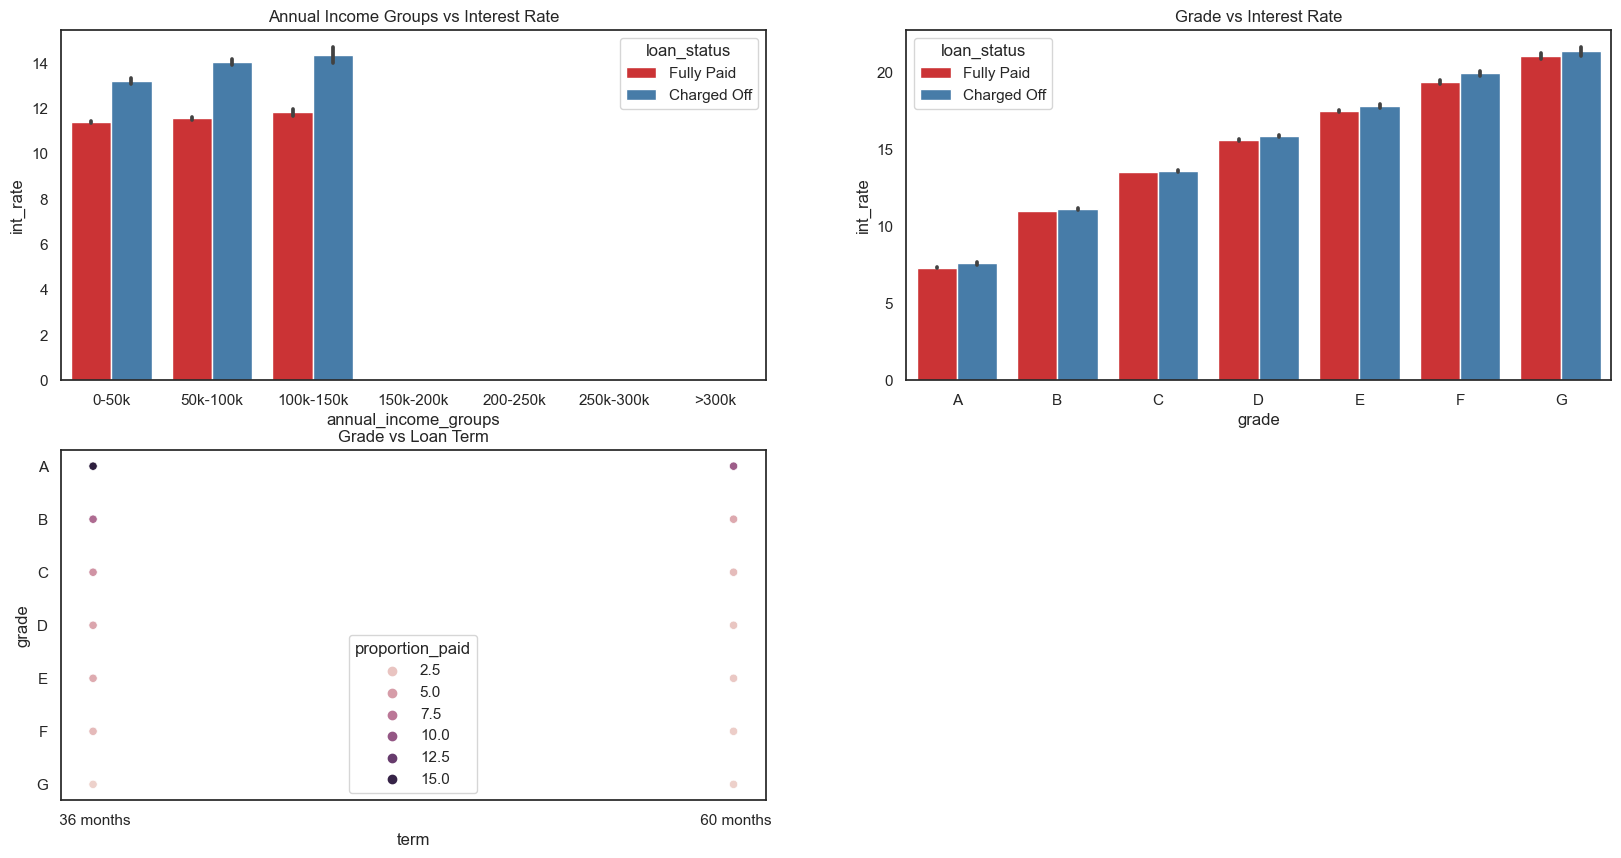

In [1012]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.barplot(x='annual_income_groups', y='int_rate', hue='loan_status', data=loan_df)
plt.title('Annual Income Groups vs Interest Rate')

plt.subplot(222)
plt.title('Grade vs Interest Rate')
grade_ord = loan_df.grade.unique()
grade_ord.sort()
sns.barplot(x='grade', y=loan_df.int_rate, order = grade_ord, hue='loan_status', data=loan_df)

plt.subplot(223)
plt.title('Grade vs Loan Term')
grade_ord = loan_df.grade.unique()
grade_ord.sort()

# Create a scatter plot
sns.scatterplot(x='term', y='grade', hue='proportion_paid', data=result_df)



##  Interest Rate vs Amount

<Figure size 2000x500 with 0 Axes>

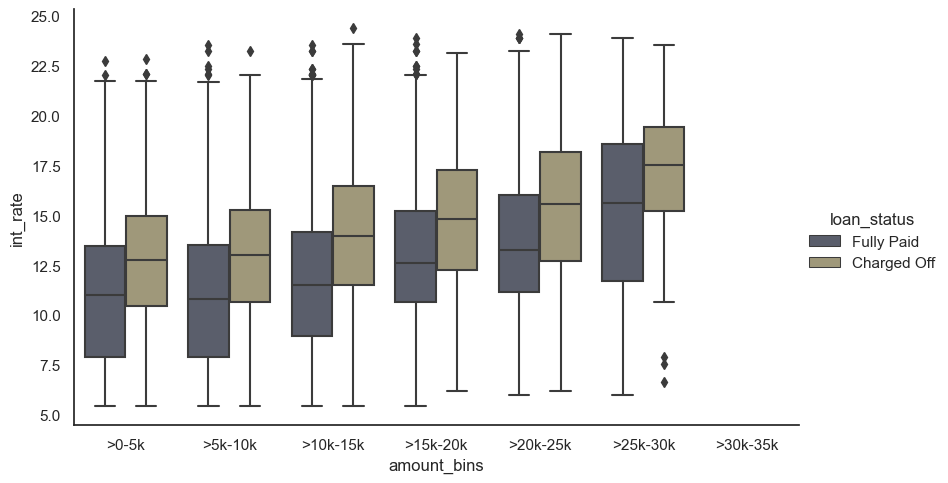

In [ ]:
# We are going to analyze whether there is any relation between amounts, interest rate and the loan status
plt.figure(figsize=(20,5))
g = sns.catplot(data =loan_df,y ='int_rate', x ='amount_bins', hue ='loan_status', palette="cividis", kind = 'box', aspect=1.66)
plt.show()

### Grade vs Amount
Is there a relation between grade and amount?


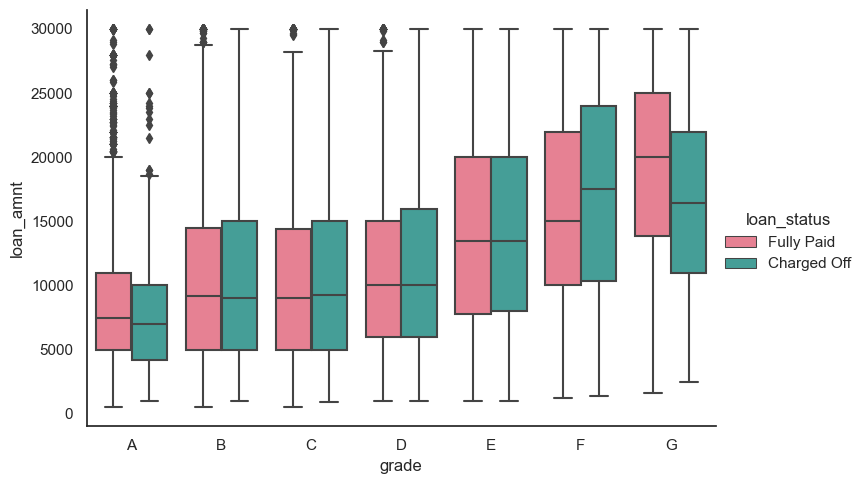

In [ ]:
sns.catplot(data=loan_df,y ='loan_amnt', x ='grade', hue ='loan_status', order=grade_ord, palette="husl",kind = 'box', aspect=1.5)
plt.show()

### Grade vs Interest Rate
How does delinquency vary by interest rate for each grade?


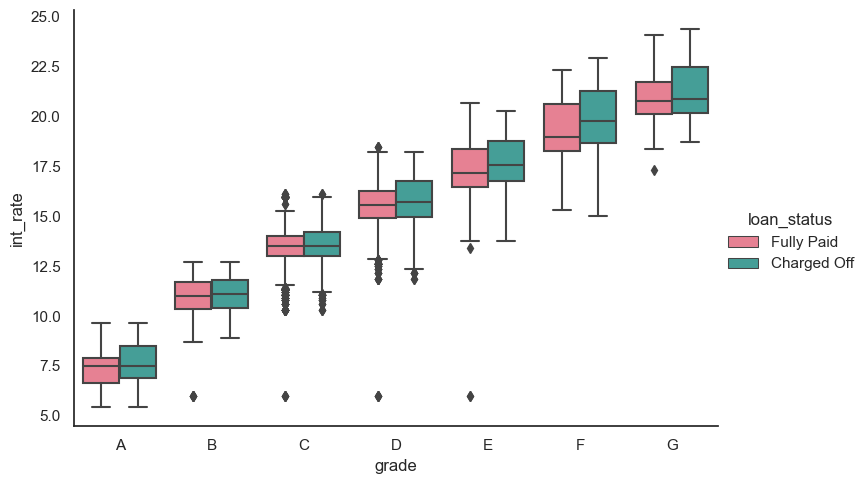

In [ ]:
sns.catplot(data=loan_df,y ='int_rate', x ='grade', hue ='loan_status', order=grade_ord, palette="husl",kind = 'box', aspect=1.5)
plt.show()

## Observation

As grade decreases (A being best grade & G being poor), you see a significant difference in median interest rates between 'Charged Off' loans vs 'Fully Paid' loans

### Grade vs default


Text(0, 0.5, 'Paid/Default Percentage')

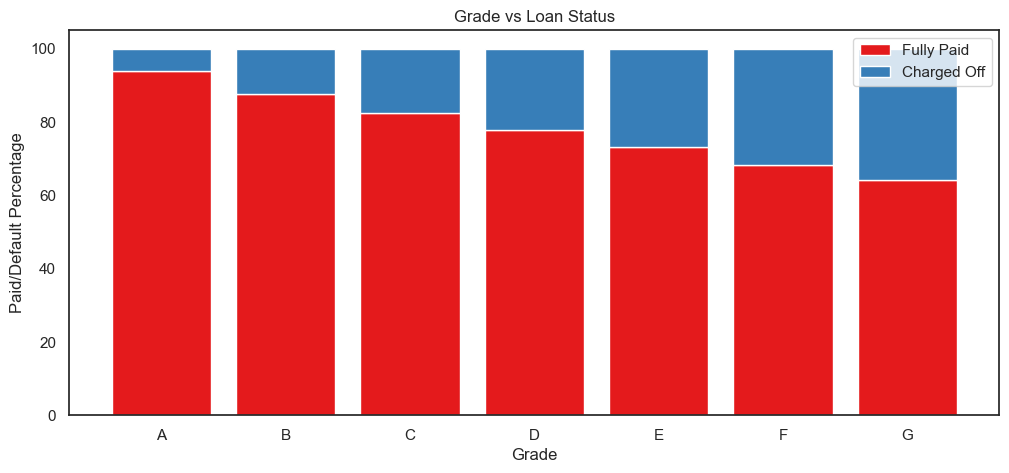

In [ ]:
df = loan_df.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum()*100)
df
criteria = df['loan_status'] == 'Charged Off'

plt.figure(figsize=(12,5))
plt.bar(x=['A','B','C','D','E','F','G'], height=df[df['loan_status'] == 'Fully Paid']['percentage'], label='Fully Paid')
plt.bar(x=['A','B','C','D','E','F','G'], bottom=df[df['loan_status'] == 'Fully Paid']['percentage'],height=df[df['loan_status'] == 'Charged Off']['percentage'], label='Charged Off')
plt.legend()
plt.title('Grade vs Loan Status')
plt.xlabel('Grade')
plt.ylabel('Paid/Default Percentage')
##sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
#plt.title('Grade vs Loan status')

## Correlation Between Features

__Is there a correlation between features__

Let us plot a correlation matrix between features in this data set.

<Axes: >

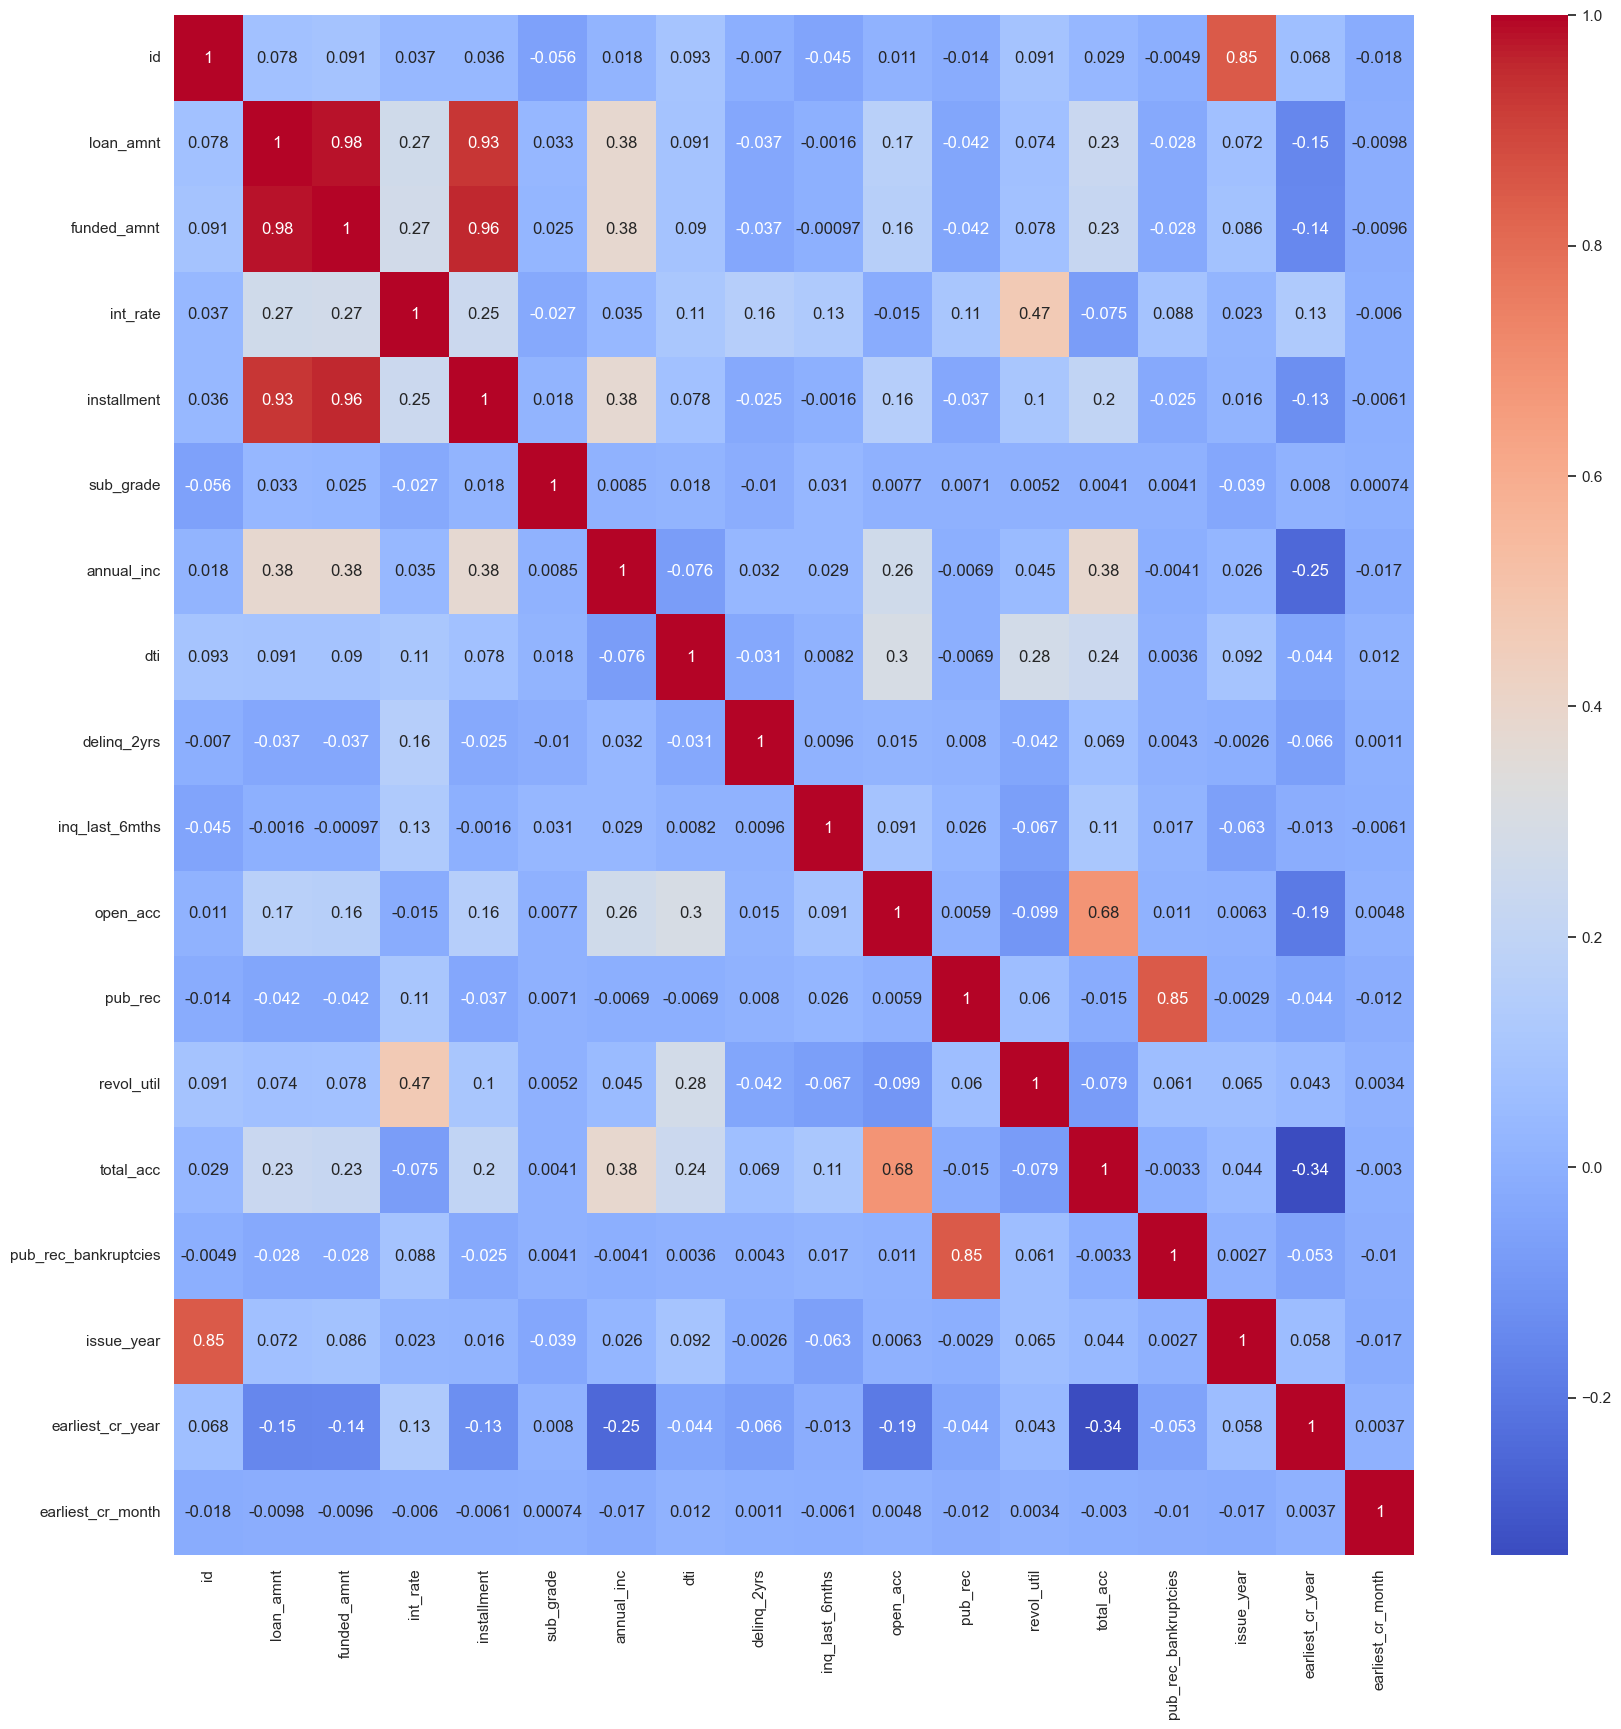

In [ ]:
correlation_matrix=loan_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


<Figure size 2500x2500 with 0 Axes>

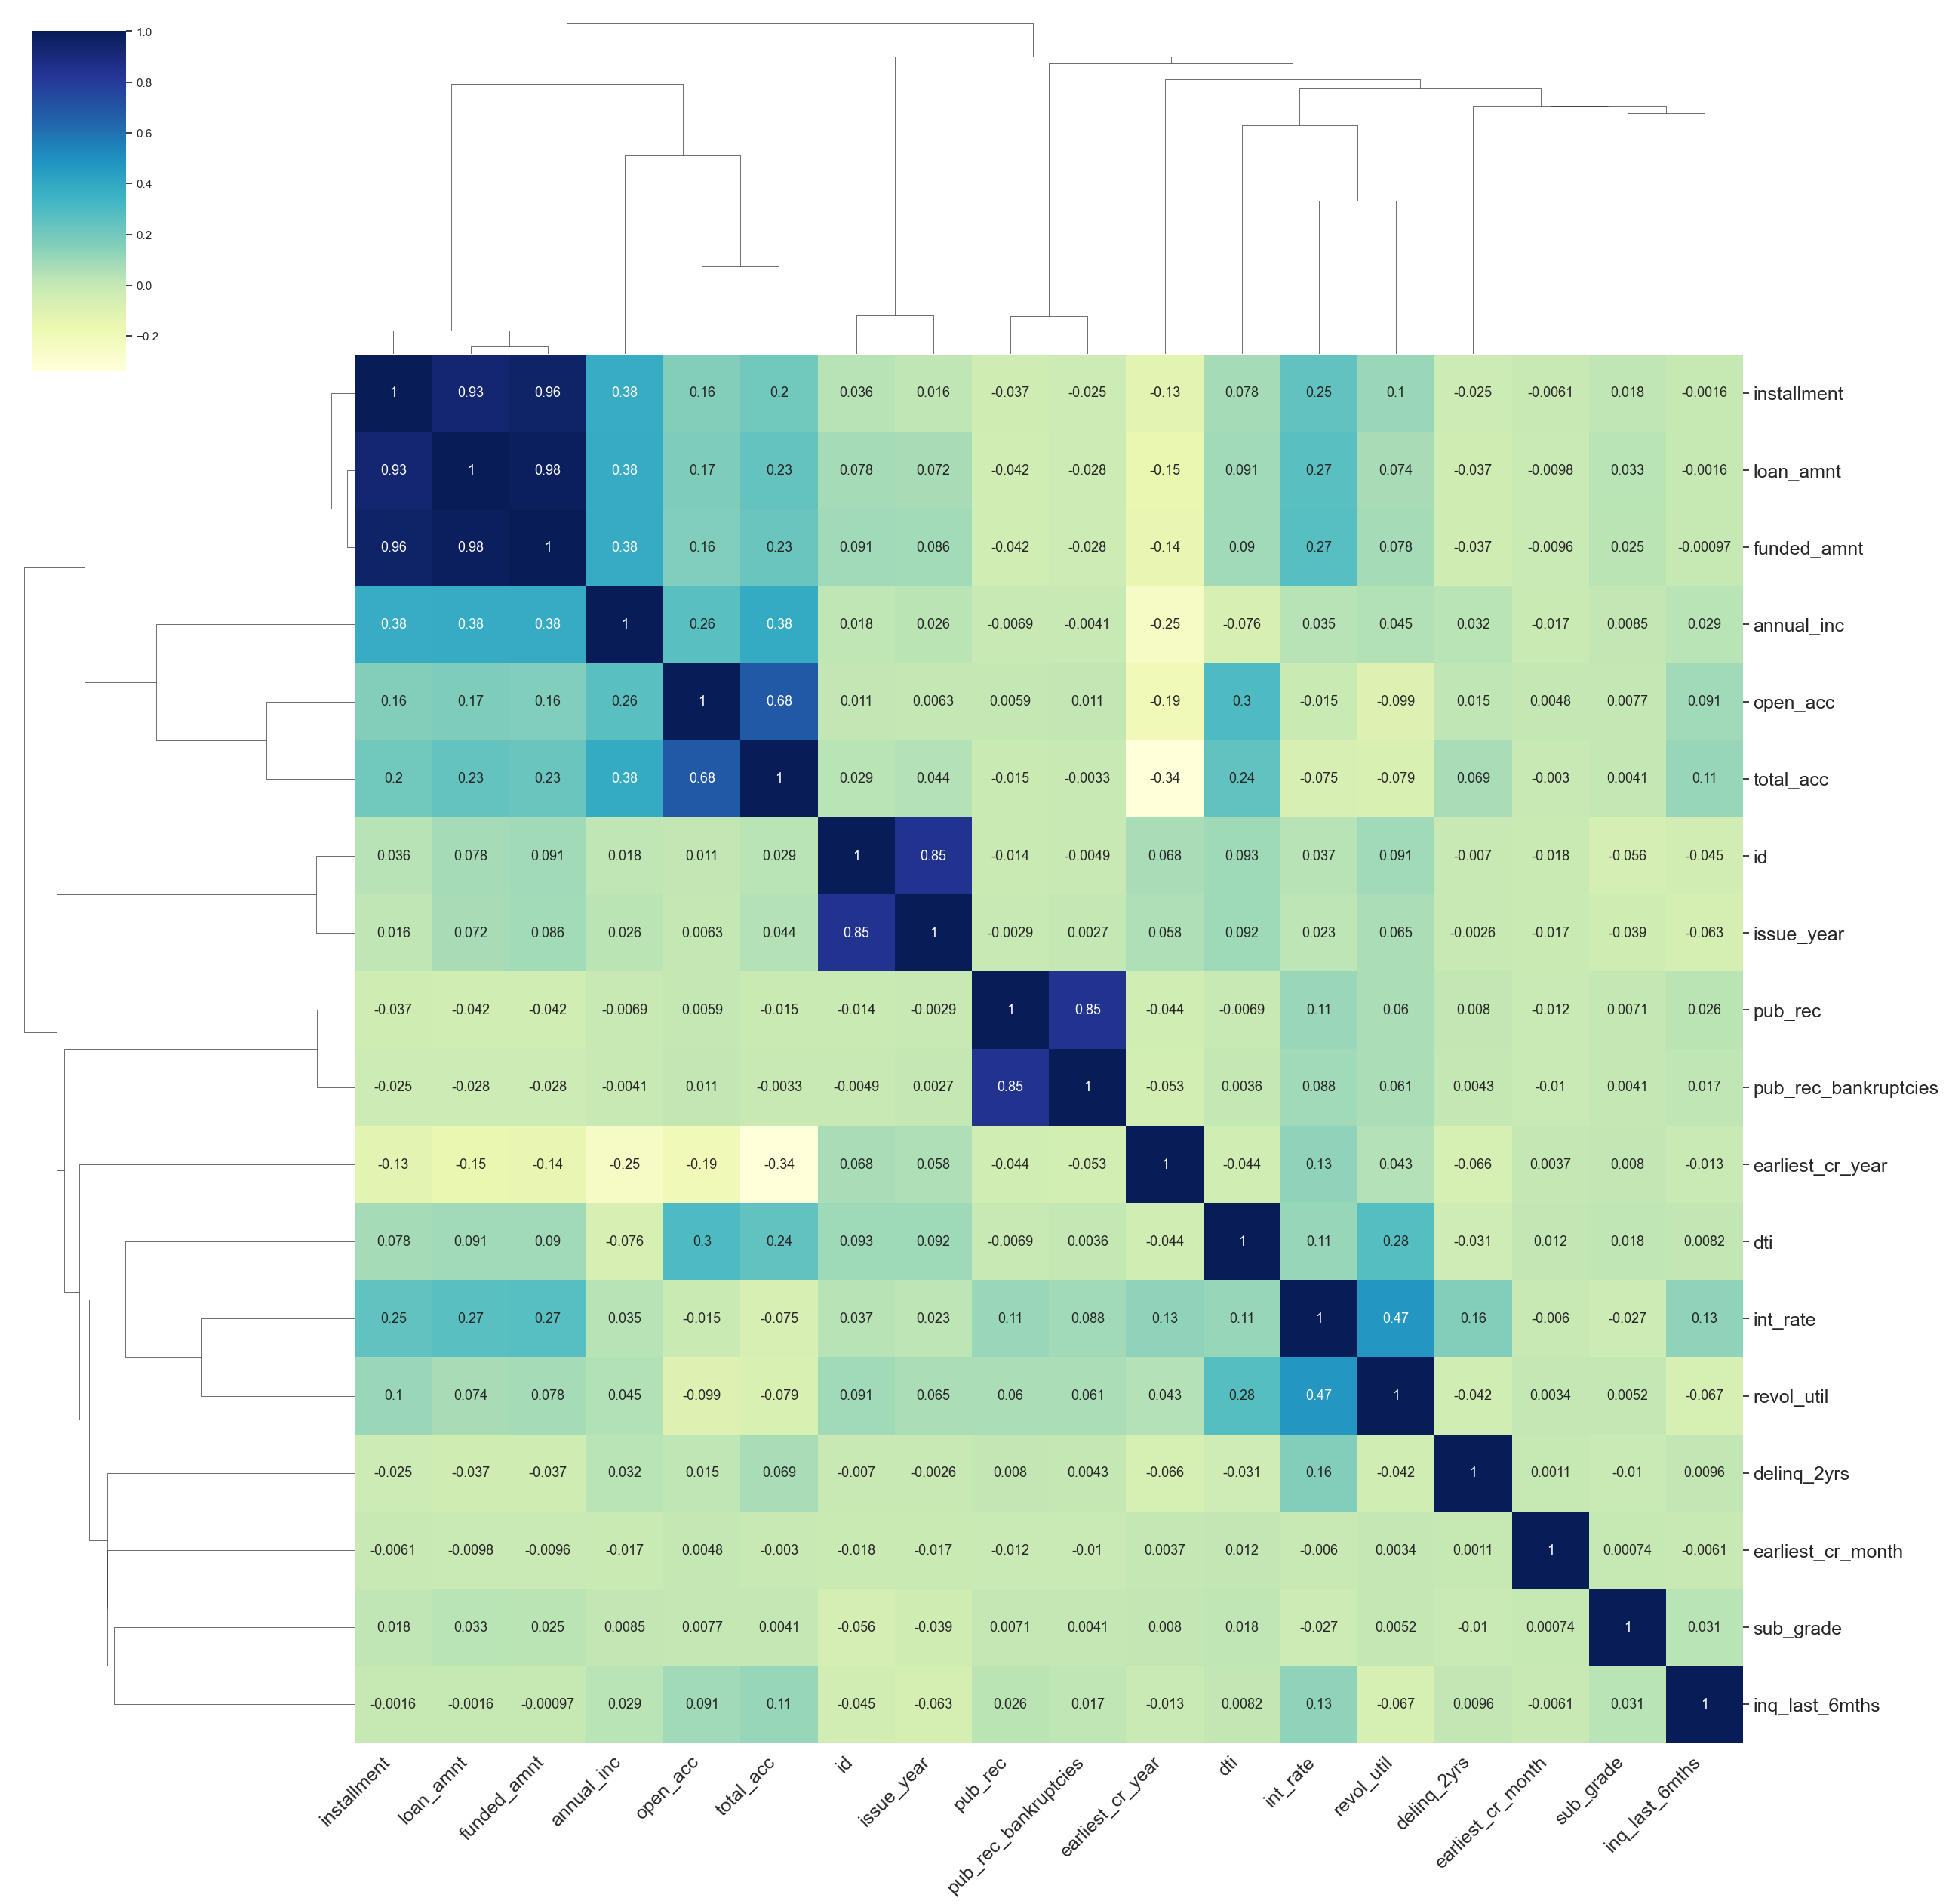

In [ ]:
# Create a corrlation matrix with heat map before we do any other computations

correlation_matrix=loan_df.corr()
plt.figure(figsize=(25,25))
g = sns.clustermap(correlation_matrix, annot=True, cmap='YlGnBu', cbar_kws={'shrink': 1.0}, figsize=(25,25), annot_kws={'fontsize': 13})
# Adjust the size of the cluster map's axes
g.ax_heatmap.set_aspect('equal')  # Set aspect ratio to equal

plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=18)
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=18)

#g.ax_col_dendrogram.set_visible(False)  # Hide the column dendrogram
#g.ax_row_dendrogram.set_visible(False)  # Hide the row dendrogram

plt.show()

### Income Groups vs Defaults

In [ ]:
income_group_default_df = loan_df.pivot_table(index=['annual_income_groups'], columns='loan_status', aggfunc='size', fill_value=0)
income_group_default_df['percentage'] = income_group_default_df['Charged Off'] / (income_group_default_df['Fully Paid'] + income_group_default_df['Charged Off']) *100
income_group_default_df = income_group_default_df.reset_index()
income_group_default_df


loan_status,annual_income_groups,Charged Off,Fully Paid,percentage
0,0-50k,2611,12772,16.973282
1,50k-100k,2313,15055,13.317596
2,100k-150k,340,3024,10.107015
3,150k-200k,0,0,NaN
4,200-250k,0,0,NaN
5,250k-300k,0,0,NaN
6,>300k,0,0,NaN


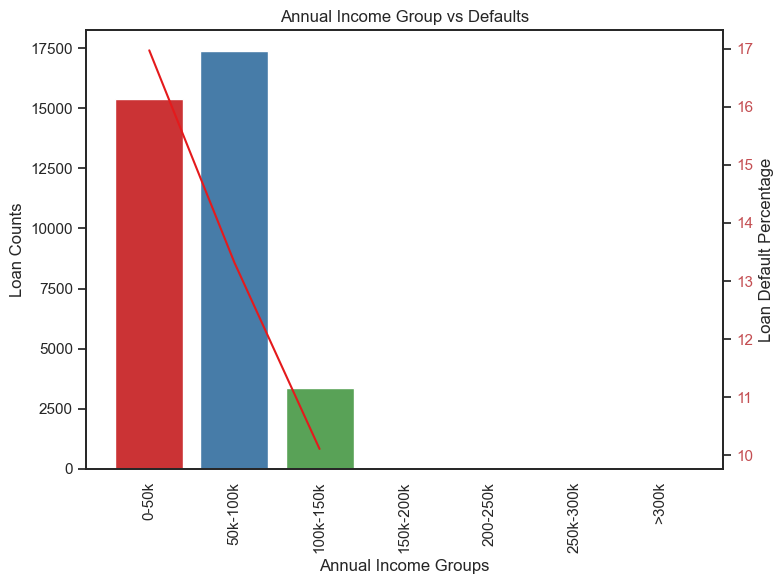

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)

sns.countplot(x='annual_income_groups', data=loan_df, ax=ax1)
ax1.set_ylabel('Loan Counts')
ax1.set_xlabel('Annual Income Groups')
ax1.set_title('Annual Income Group vs Defaults')
ax2 = ax1.twinx()

sns.lineplot(x='annual_income_groups', y='percentage',data=income_group_default_df, ax=ax2)

ax2.tick_params(axis='y', labelcolor='r')
# plt.title('Purpose vs Loan Counts')
plt.xlabel('Purpose')
plt.ylabel('Loan Default Percentage')


# Adjust layout
plt.tight_layout()

plt.show()

## Is there a specific purpose where we see defaults

__Analysing purpose & corresponding defaults will help__

Let us visualize the purpose and their default rates



In [ ]:
purpose_df = loan_df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
purpose_df['percentage'] = purpose_df.groupby('purpose').transform(lambda x: x/x.sum()*100)
purpose_df = purpose_df[purpose_df.loan_status == 'Charged Off']
purpose_df

,purpose,loan_status,id,percentage
0,car,Charged Off,159,10.980663
2,credit_card,Charged Off,507,10.725619
4,debt_consolidation,Charged Off,2585,15.223793
6,educational,Charged Off,54,17.307692
8,home_improvement,Charged Off,314,12.509960
10,house,Charged Off,53,16.012085
12,major_purchase,Charged Off,216,10.603829
14,medical,Charged Off,102,15.987461
16,moving,Charged Off,90,16.393443
18,other,Charged Off,599,16.308195


Text(0, 0.5, 'Percentage of Default')

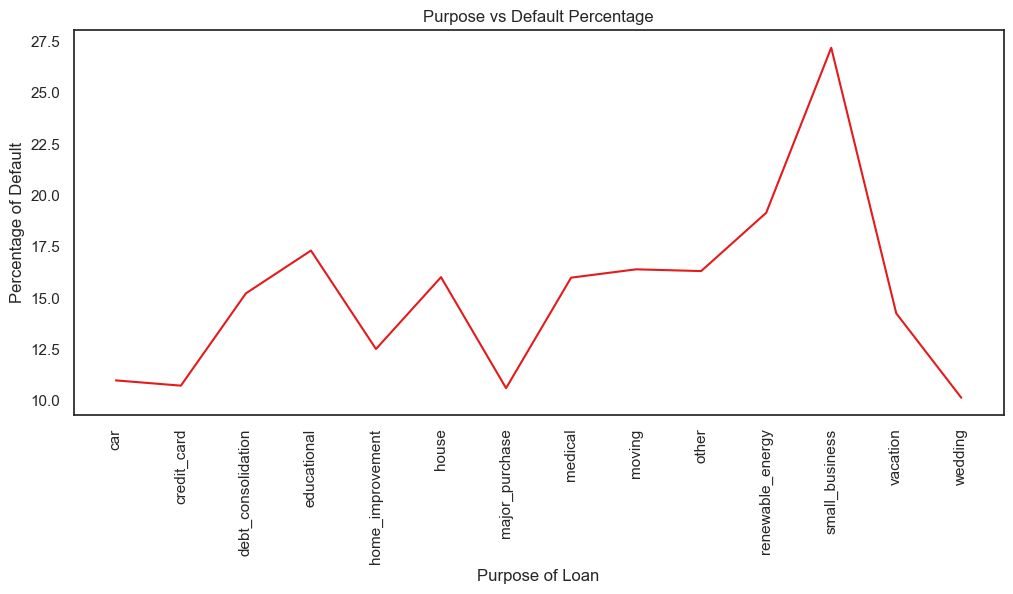

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='purpose', y='percentage', data=purpose_df)
plt.xticks(rotation=90)
plt.title('Purpose vs Default Percentage')
plt.xlabel('Purpose of Loan')
plt.ylabel('Percentage of Default')

In [ ]:
purpose_grade_df = loan_df.pivot_table(index=['purpose', 'grade'], columns='loan_status', aggfunc='size', fill_value=0)
purpose_grade_df['percentage'] = purpose_grade_df['Charged Off'] / (purpose_grade_df['Fully Paid'] + purpose_grade_df['Charged Off']) *100
purpose_grade_df = purpose_grade_df.reset_index()


bins = [0, 5, 15, 25, float('inf')]
labels = ['Mild', 'Moderate', 'Elevated', 'Severe']
purpose_grade_df['risk_category'] = pd.cut(purpose_grade_df['percentage'], bins=bins, labels=labels)

purpose_grade_df

loan_status,purpose,grade,Charged Off,Fully Paid,percentage,risk_category
0,car,A,32,549,5.507745,Moderate
1,car,B,55,397,12.168142,Moderate
2,car,C,36,194,15.652174,Elevated
3,car,D,24,96,20.000000,Elevated
4,car,E,7,46,13.207547,Moderate
5,car,F,4,6,40.000000,Severe
6,car,G,1,1,50.000000,Severe
7,credit_card,A,62,1285,4.602821,Mild
8,credit_card,B,142,1396,9.232770,Moderate
9,credit_card,C,139,845,14.126016,Moderate


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'car'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'debt_consolidation'),
  Text(3, 0, 'educational'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'house'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'other'),
  Text(10, 0, 'renewable_energy'),
  Text(11, 0, 'small_business'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'wedding')])

<Figure size 1000x500 with 0 Axes>

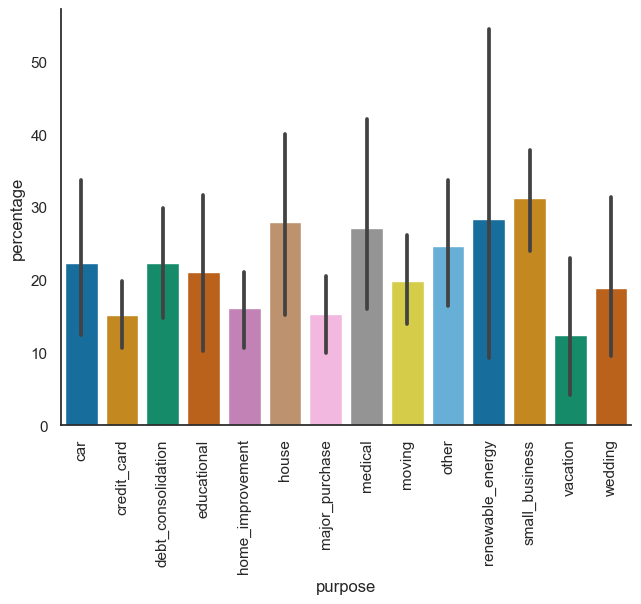

In [ ]:
plt.figure(figsize=(10,5))
# Create a scatter plot
sns.catplot(x='purpose', y='percentage', palette='colorblind',data=purpose_grade_df, kind="bar", height=5, aspect=1.33,)
plt.xticks(rotation=90)
#plt.legend(loc='upper right', bbox_to_anchor=(1.18, 1))
#plt.title('Purpose vs Default Percentage')
#plt.xlabel('Purpose of Loan')
#plt.ylabel('Grade')

## Observation

__Small Businesses represent the highest risk across the loan purposes__



## Grade vs Income


Text(50.351642507530116, 0.5, 'Annual Income')

<Figure size 1200x500 with 0 Axes>

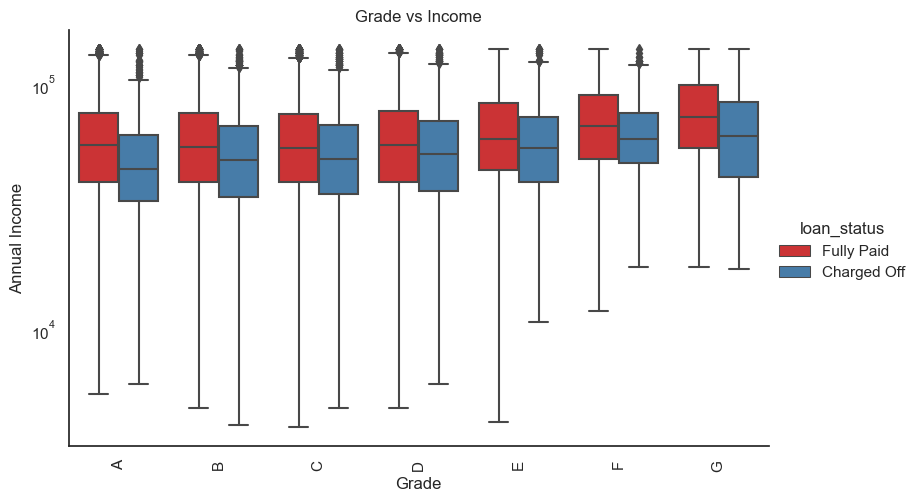

In [ ]:
plt.figure(figsize=(12,5))
facet_grid = sns.catplot(x='grade', y='annual_inc', order=grade_ord, hue='loan_status',data=loan_df, kind='box', aspect=1.66)

facet_grid.ax.set_yscale("log")
plt.xticks(rotation=90)
plt.title('Grade vs Income')
plt.xlabel('Grade')
plt.ylabel('Annual Income')

<Figure size 1200x500 with 0 Axes>

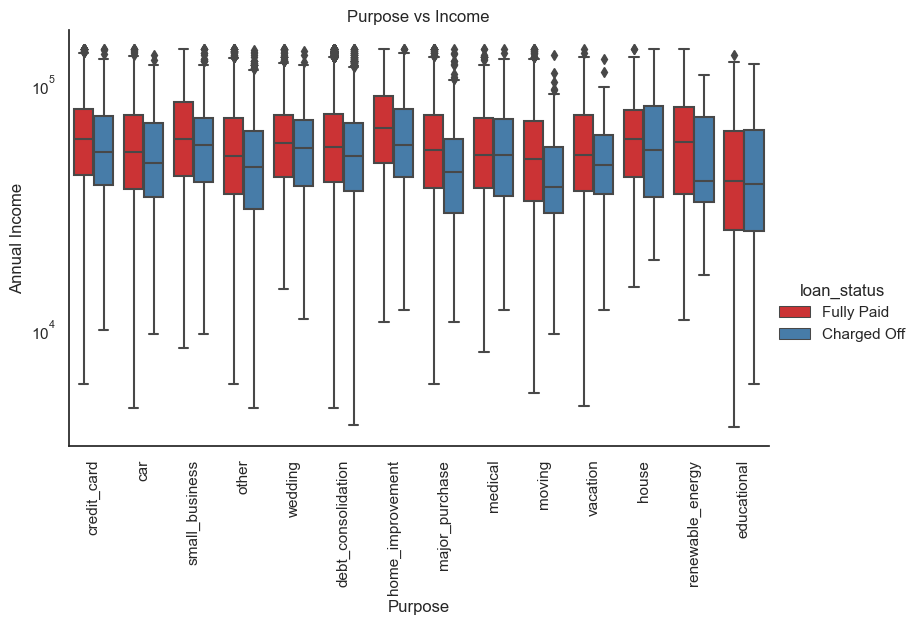

In [ ]:
plt.figure(figsize=(12,5))
facet_grid = sns.catplot(x='purpose', y='annual_inc', hue='loan_status',data=loan_df, kind='box', aspect=1.66)

facet_grid.ax.set_yscale("log")
plt.xticks(rotation=90)
plt.title('Purpose vs Income')
plt.xlabel('Purpose')
plt.ylabel('Annual Income')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'car'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'debt_consolidation'),
  Text(3, 0, 'educational'),
  Text(4, 0, 'home_improvement'),
  Text(5, 0, 'house'),
  Text(6, 0, 'major_purchase'),
  Text(7, 0, 'medical'),
  Text(8, 0, 'moving'),
  Text(9, 0, 'other'),
  Text(10, 0, 'renewable_energy'),
  Text(11, 0, 'small_business'),
  Text(12, 0, 'vacation'),
  Text(13, 0, 'wedding')])

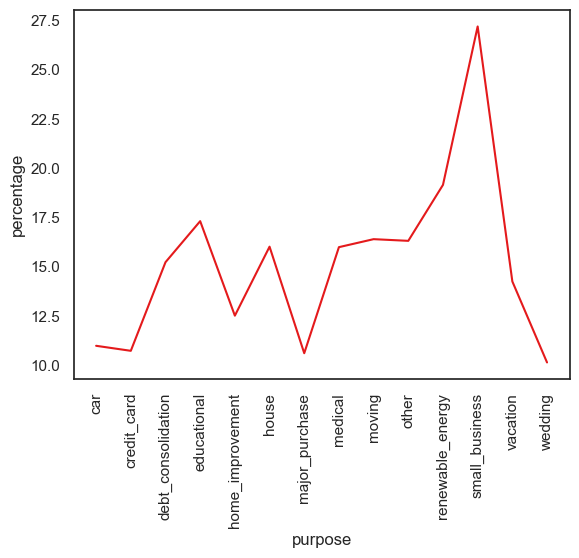

In [ ]:
sns.lineplot(x='purpose', y='percentage', data=purpose_df)
plt.xticks(rotation=90)

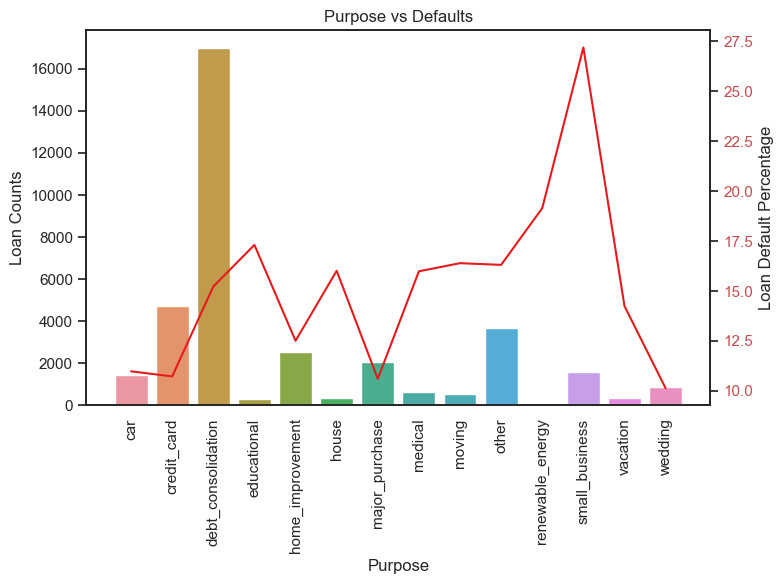

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)

sns.countplot(x='purpose', data=loan_df, order=sorted(loan_df['purpose'].unique()), ax=ax1)
ax1.set_ylabel('Loan Counts')
ax1.set_xlabel('Purpose')
ax1.set_title('Purpose vs Defaults')
ax2 = ax1.twinx()

sns.lineplot(x='purpose', y='percentage',data=purpose_df, ax=ax2)

ax2.tick_params(axis='y', labelcolor='r')
# plt.title('Purpose vs Loan Counts')
plt.xlabel('Purpose')
plt.ylabel('Loan Default Percentage')


# Adjust layout
plt.tight_layout()

plt.show()

Text(49.02696724397589, 0.5, 'Loan Amount')

<Figure size 1200x500 with 0 Axes>

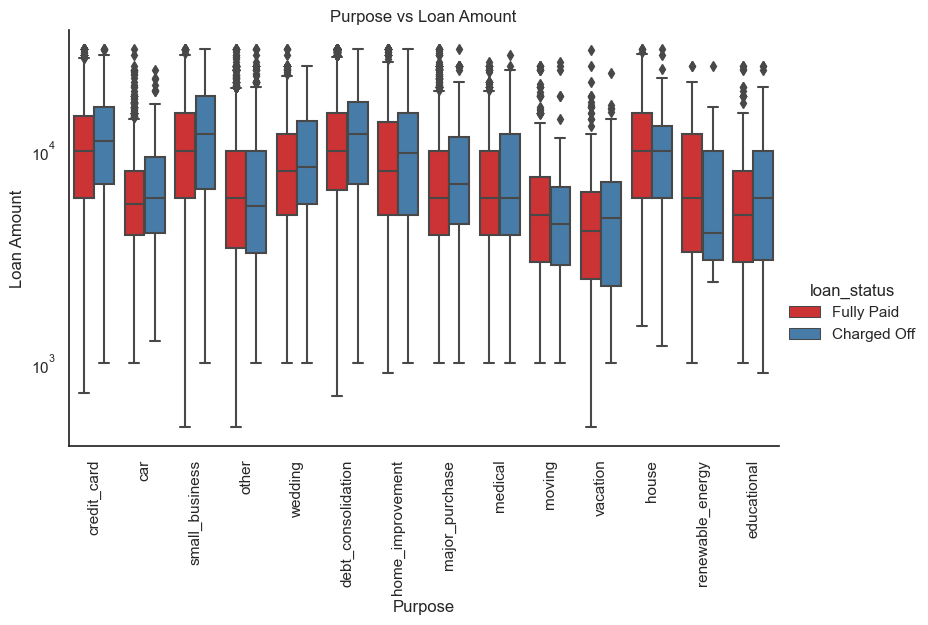

In [ ]:
plt.figure(figsize=(12,5))
facet_grid = sns.catplot(x='purpose', y='loan_amnt', hue='loan_status',data=loan_df, kind='box', aspect=1.66)

facet_grid.ax.set_yscale("log")
plt.xticks(rotation=90)
plt.title('Purpose vs Loan Amount')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')

## Income Groups vs Loan Amounts

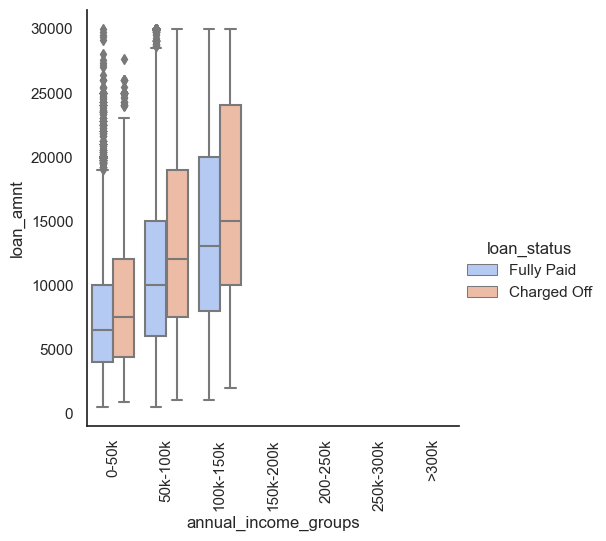

In [ ]:
# We are going to analyze whether there is any relation between amounts, interest rate and the loan status
sns.catplot(data =loan_df,y ='loan_amnt', x ='annual_income_groups', hue ='loan_status',palette="coolwarm",kind = 'box')
plt.xticks(rotation=90)

plt.show()